In [9]:
%matplotlib inline
import matplotlib.pylab as pylab
import matplotlib.pyplot as plt
from collections import Counter, defaultdict
import numpy as np
import pandas as pd
import networkx as nx
from math import sin, cos, sqrt, atan2, radians
from ownershipNet import *
#make the graphs bigger
pylab.rcParams['figure.figsize'] = (32.0, 24.0)
pylab.rcParams['font.size'] = 24

In [20]:
def buildNamedBusinessGraph(data):
    G = nx.Graph()
    names = data.keys()
    for k,i in enumerate(names): G.add_node(i)
        
    for name1 in names:
        for name2 in names:
            if name1 != name2 and len(list(set(data[name1]) & set(data[name2]))):
                G.add_edge(name1,name2)
    
    labels={}
    for k,i in enumerate(names): labels[i] = i
    return G, labels

def buildBusinessGraph(data):
    G = nx.Graph()
    names = data.keys()
    businesses = list(Counter([item for sublist in data.values() for item in sublist]).keys())
    
    businessMembers = defaultdict(list)
    for b in businesses:
        for name in names:
            if b in data[name]:
                businessMembers[b].append(name)
            
    businessList = businessMembers.keys()
    for k,i in enumerate(businessList): G.add_node(i)
    for b1 in businessList:
        for b2 in businessList:
            if b1 != b2 and len(list(set(businessMembers[b1]) & set(businessMembers[b2]))):
                G.add_edge(b1,b2)
    
    labels={}
    for k,i in enumerate(businessList): labels[i] = i
    return G, labels

def plotGraph(G,labels,colors=None):
    pos=nx.spring_layout(G,k=0.7)
    nx.draw(G,pos,node_color=colors)
    for label in pos:
        x,y = pos[label]
        plt.text(x,y+0.035,s=labels[label],horizontalalignment='center',fontsize=24)

def saveGraphToFile(G, filename):
    file_ = nx.to_numpy_matrix(G)
    print(file_.shape)
    print()
    np.savetxt(filename,file_, "%d") 

# Base owners' network

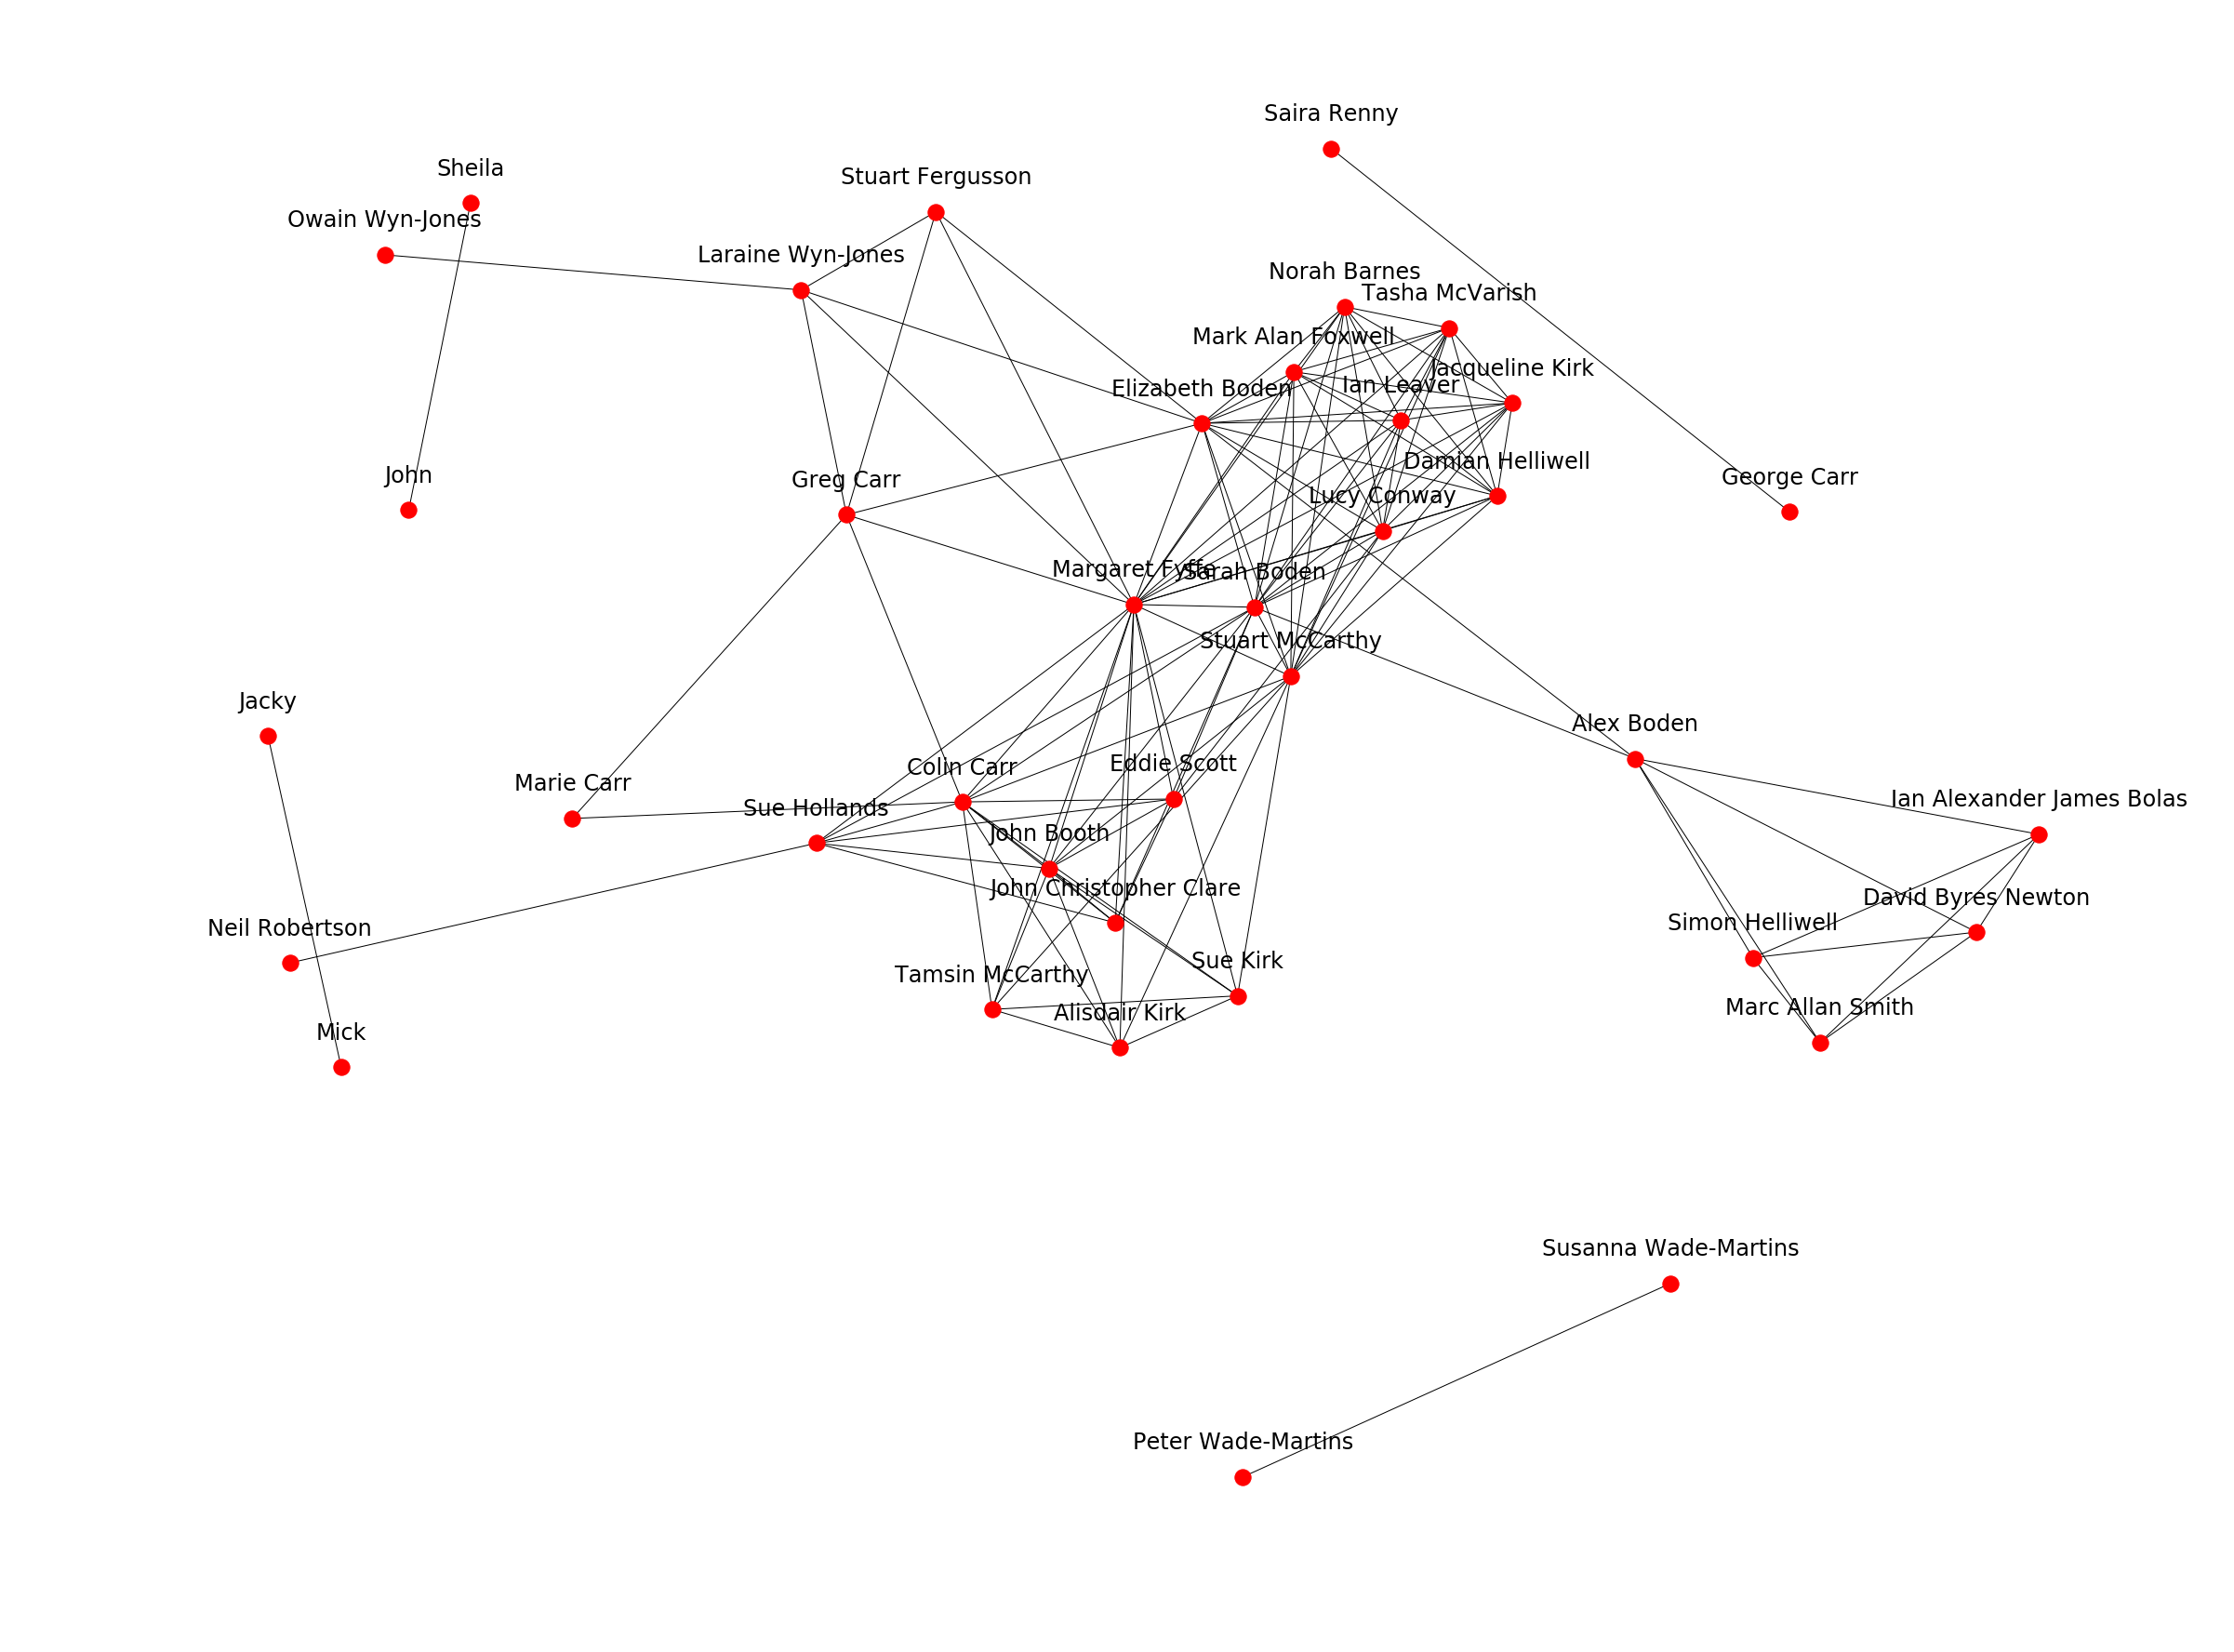

In [17]:
data = ownershipGraph()
G,labels = buildNamedBusinessGraph(data)
remove = [node for node,degree in G.degree() if degree == 0]
G.remove_nodes_from(remove)
plotGraph(G,labels)

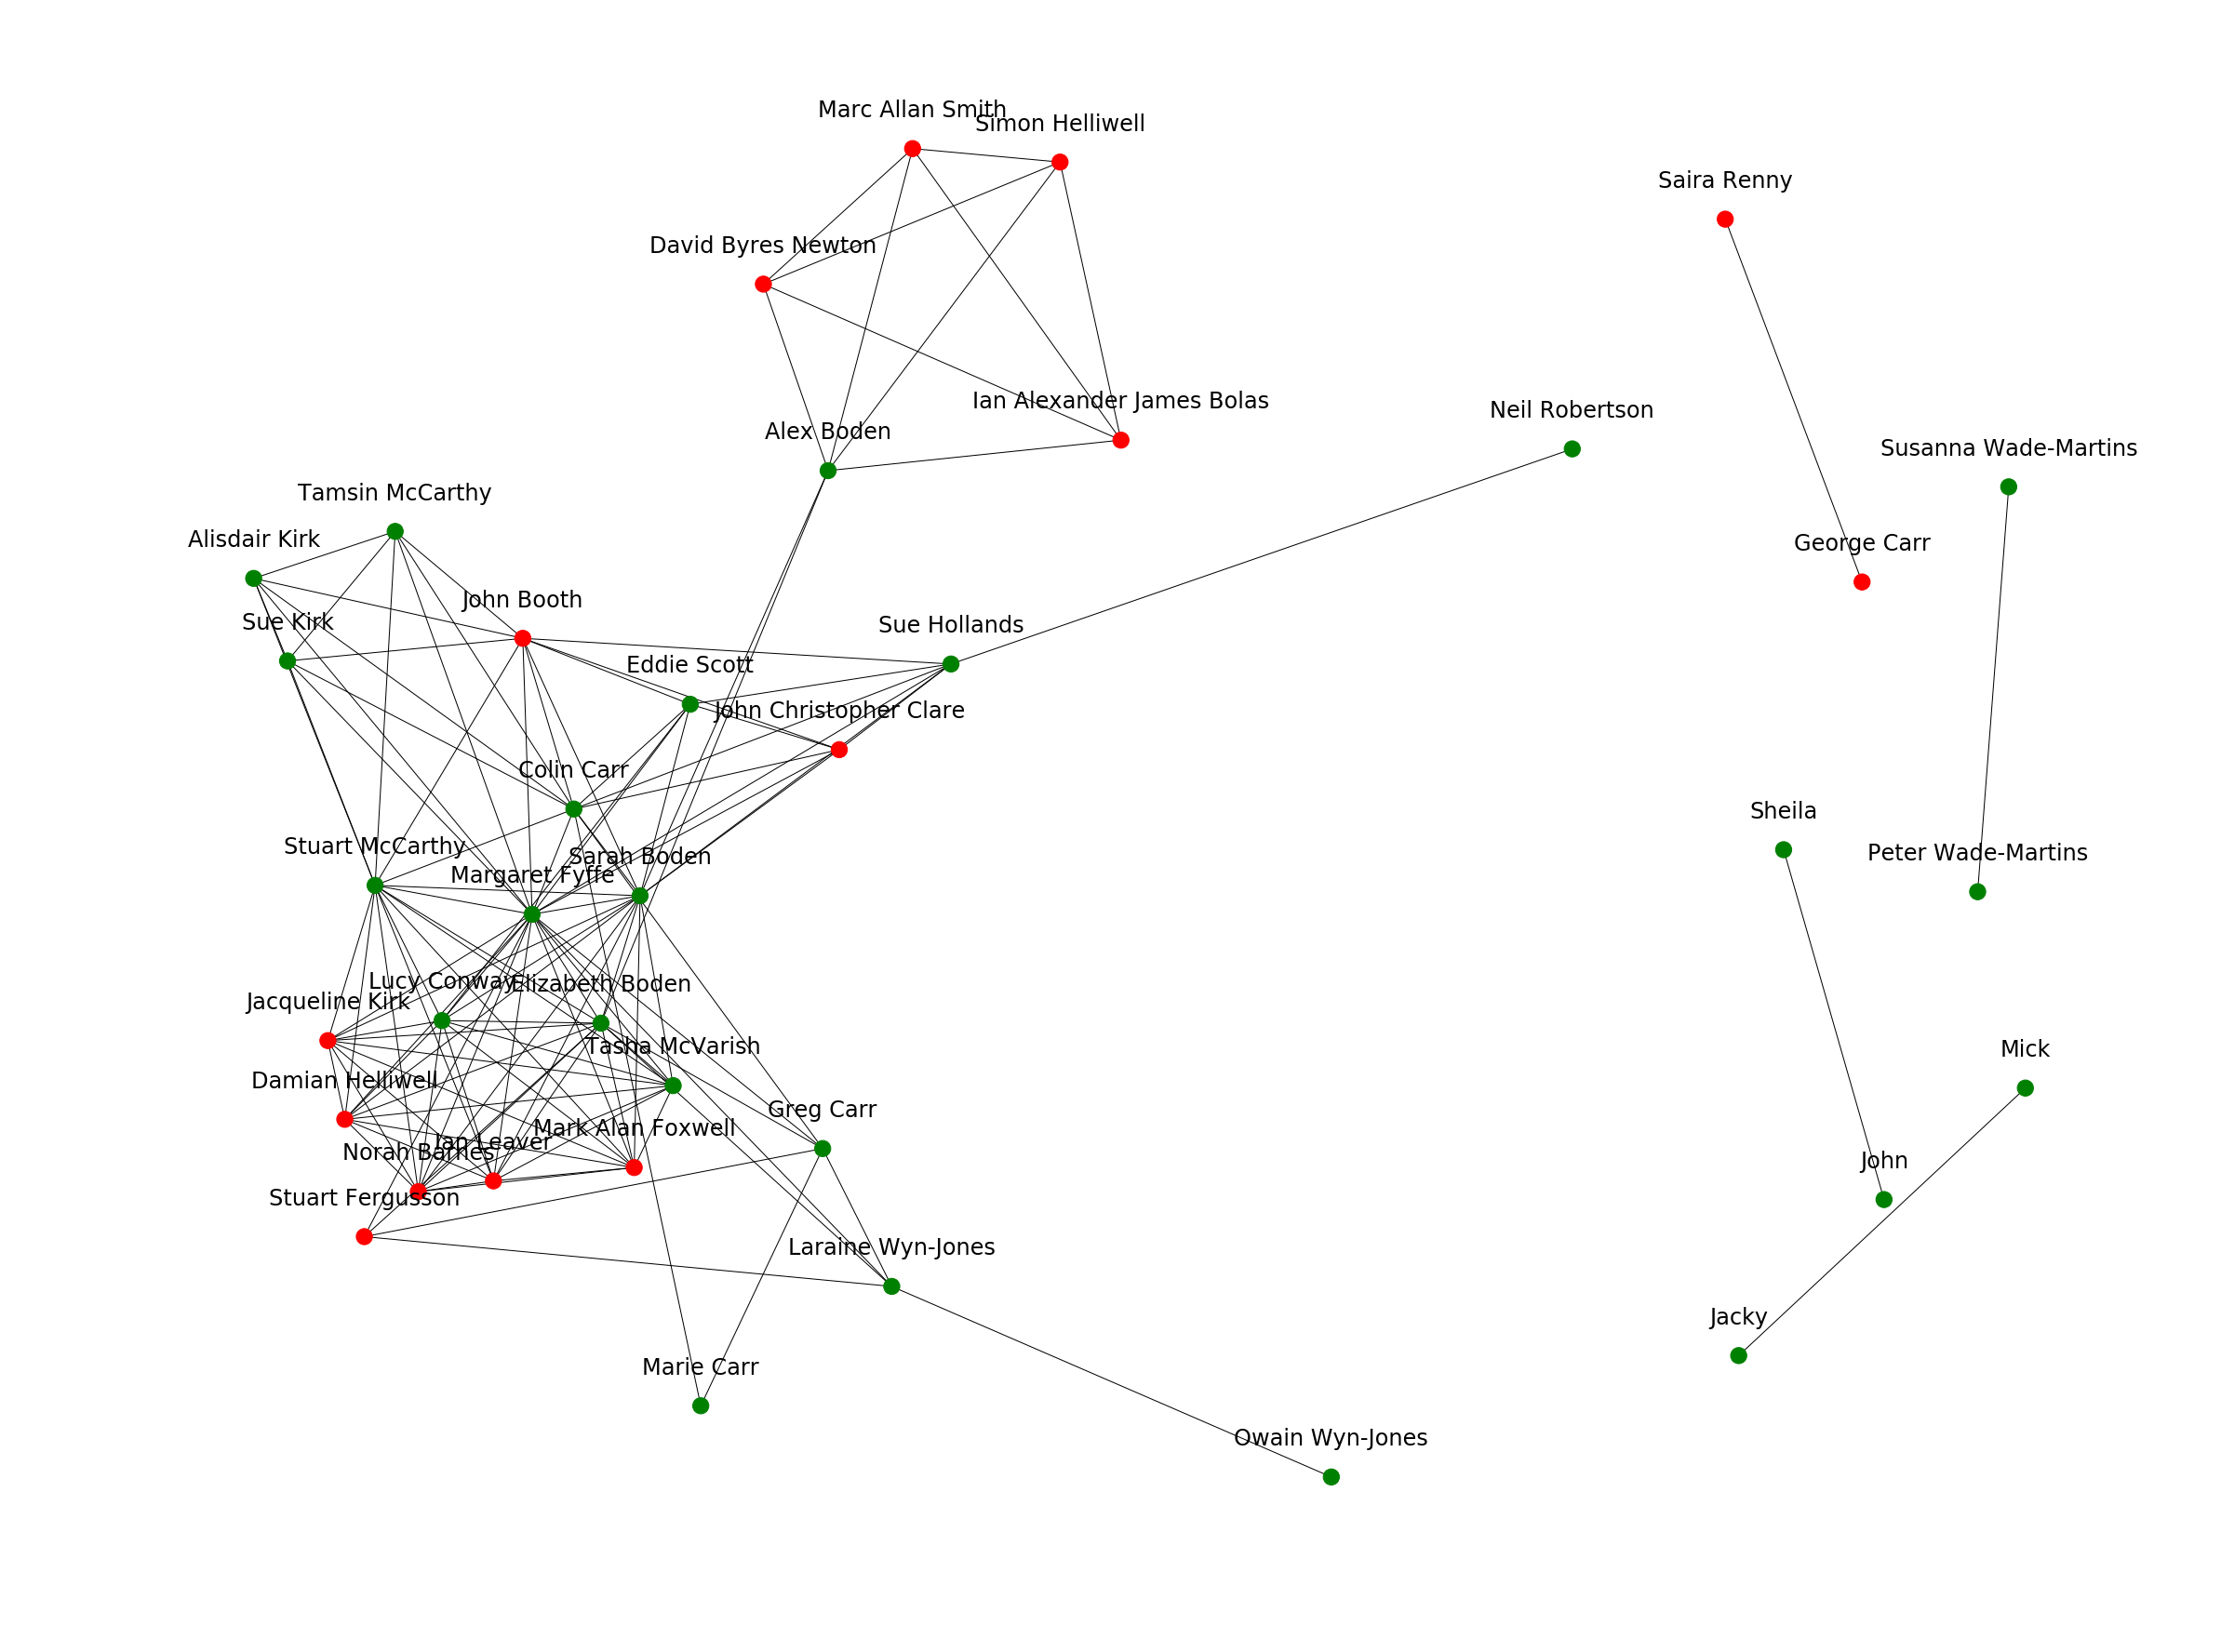

In [21]:
inTourism = involvedInTourism()
data = ownershipGraph()
G,labels = buildNamedBusinessGraph(data)
remove = [node for node,degree in G.degree() if degree == 0]
G.remove_nodes_from(remove)
colors = ["red" if inTourism[x] == 0 else "green" for x in G.nodes()]
plotGraph(G,labels,colors)

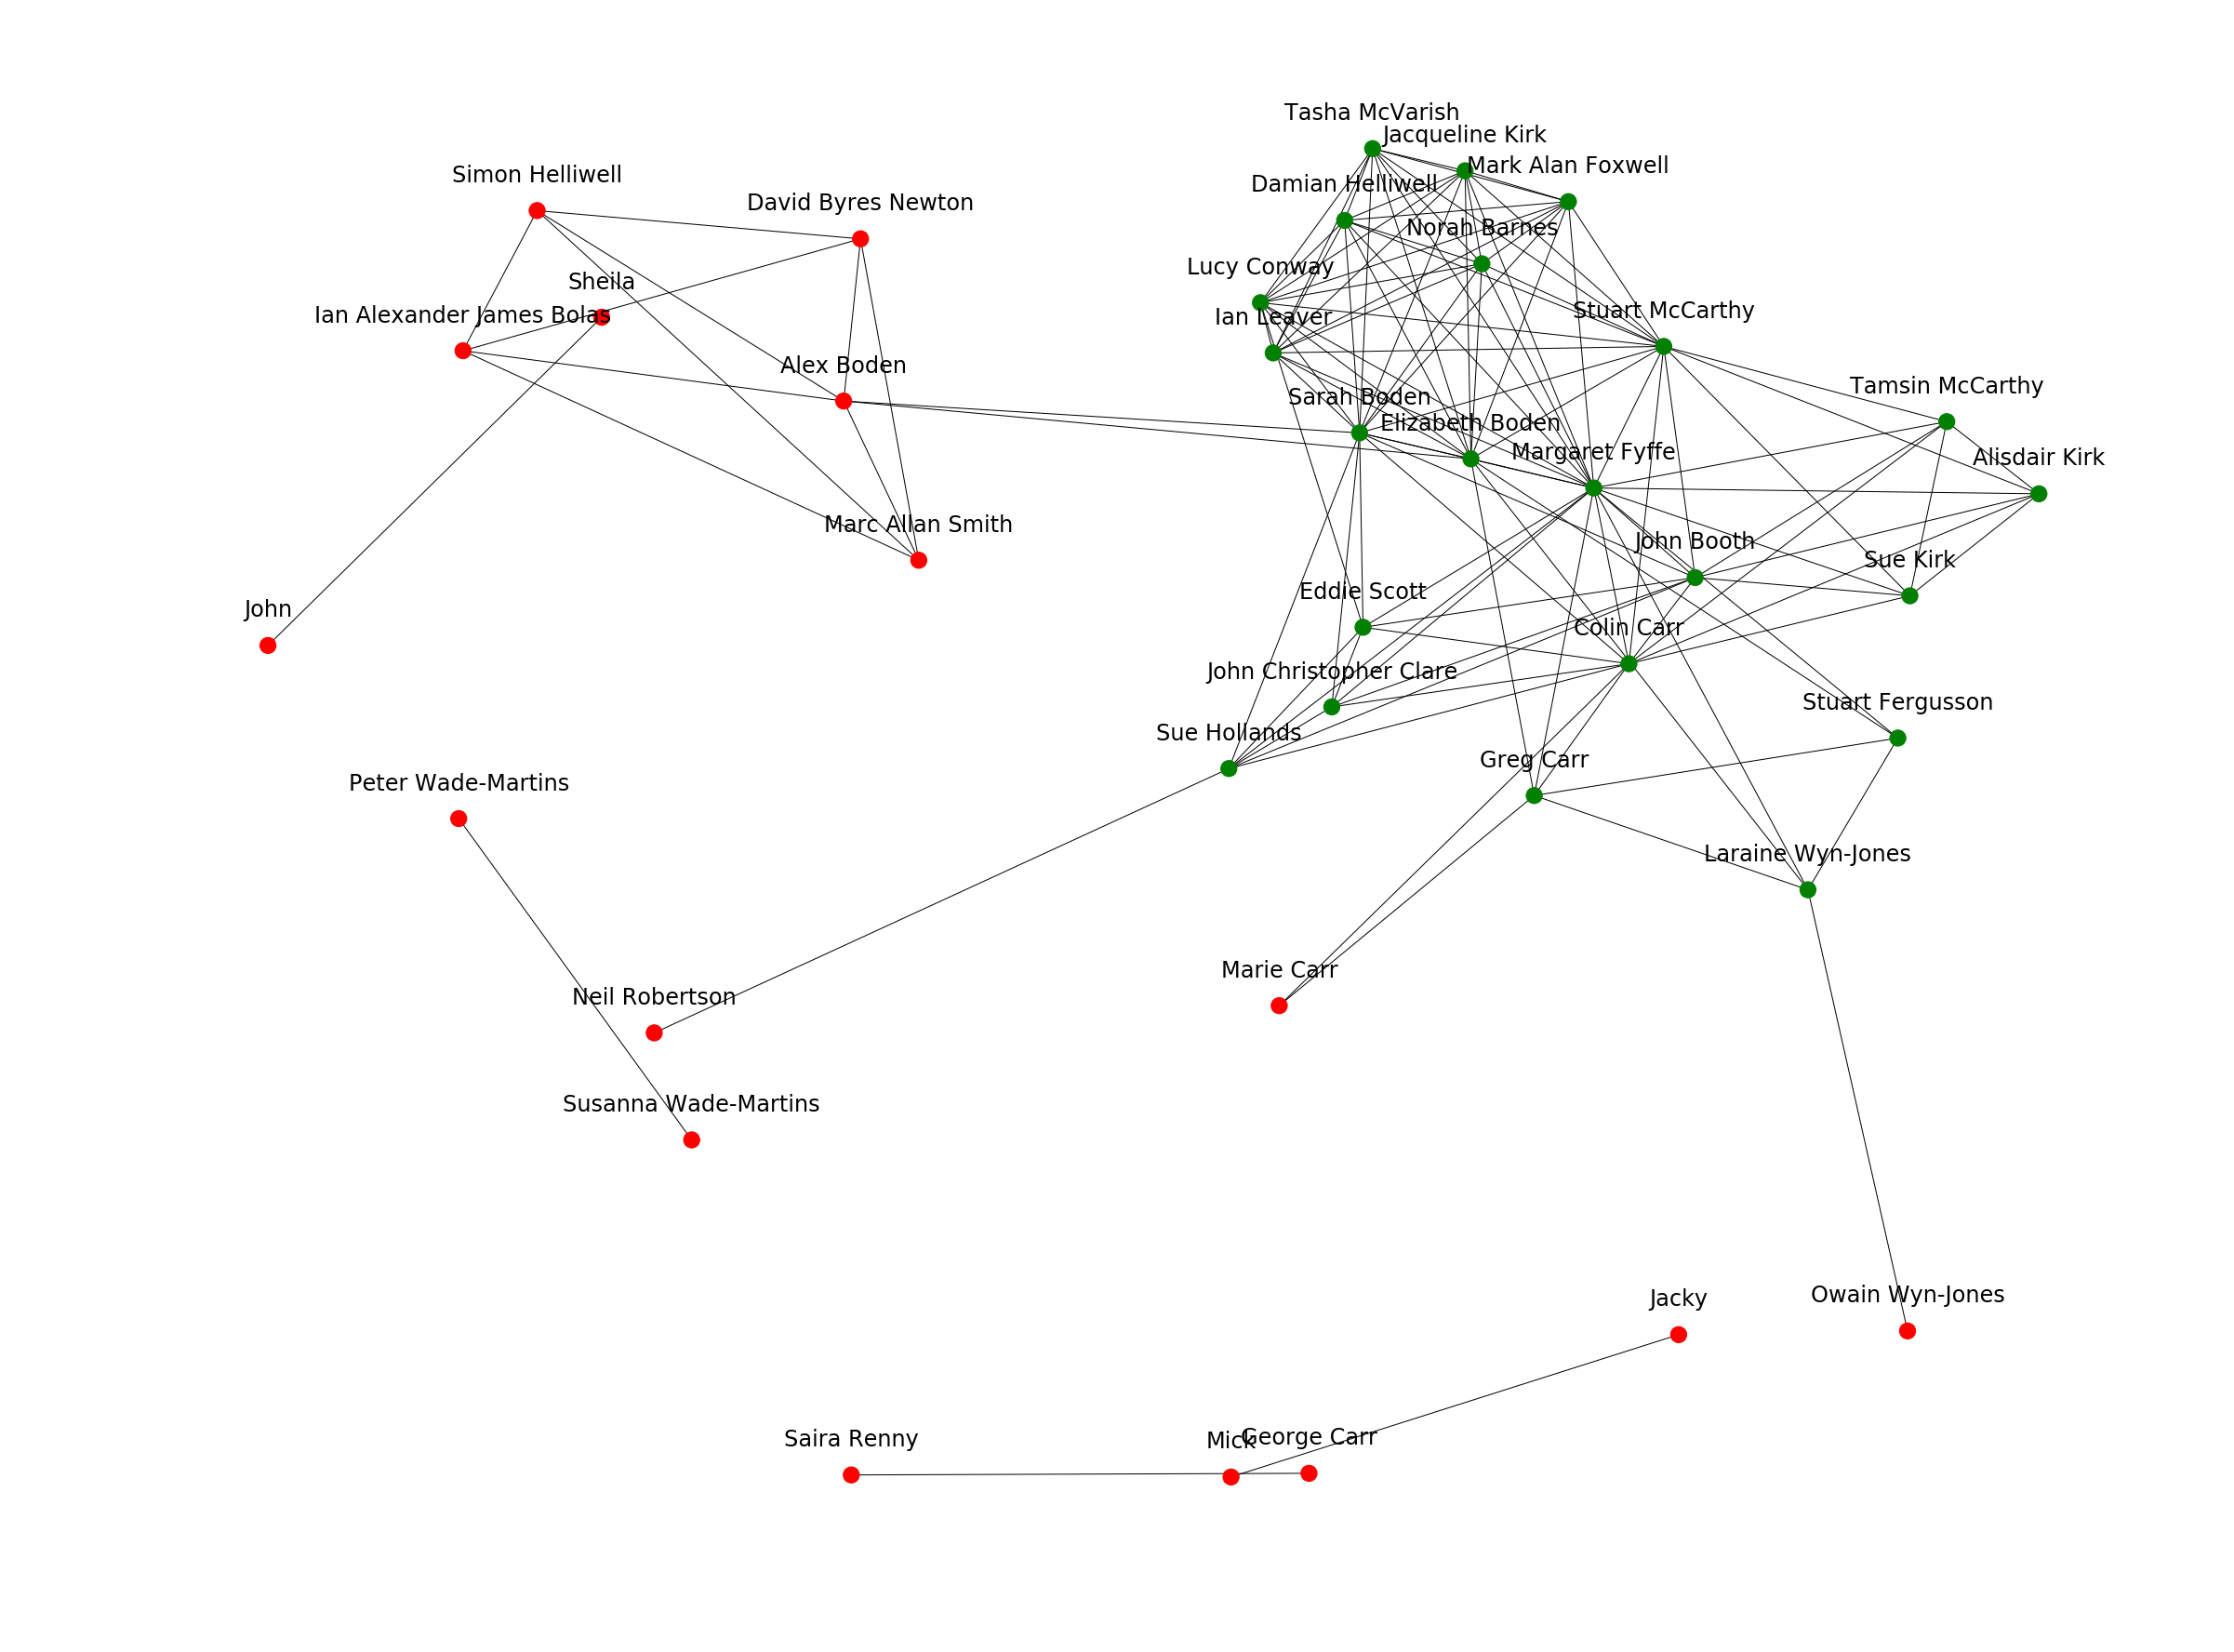

In [22]:
inPolitics = involvedInPolitics()
data = ownershipGraph()
G,labels = buildNamedBusinessGraph(data)
remove = [node for node,degree in G.degree() if degree == 0]
G.remove_nodes_from(remove)
colors = ["red" if inPolitics[x] == 0 else "green" for x in G.nodes()]
plotGraph(G,labels,colors)

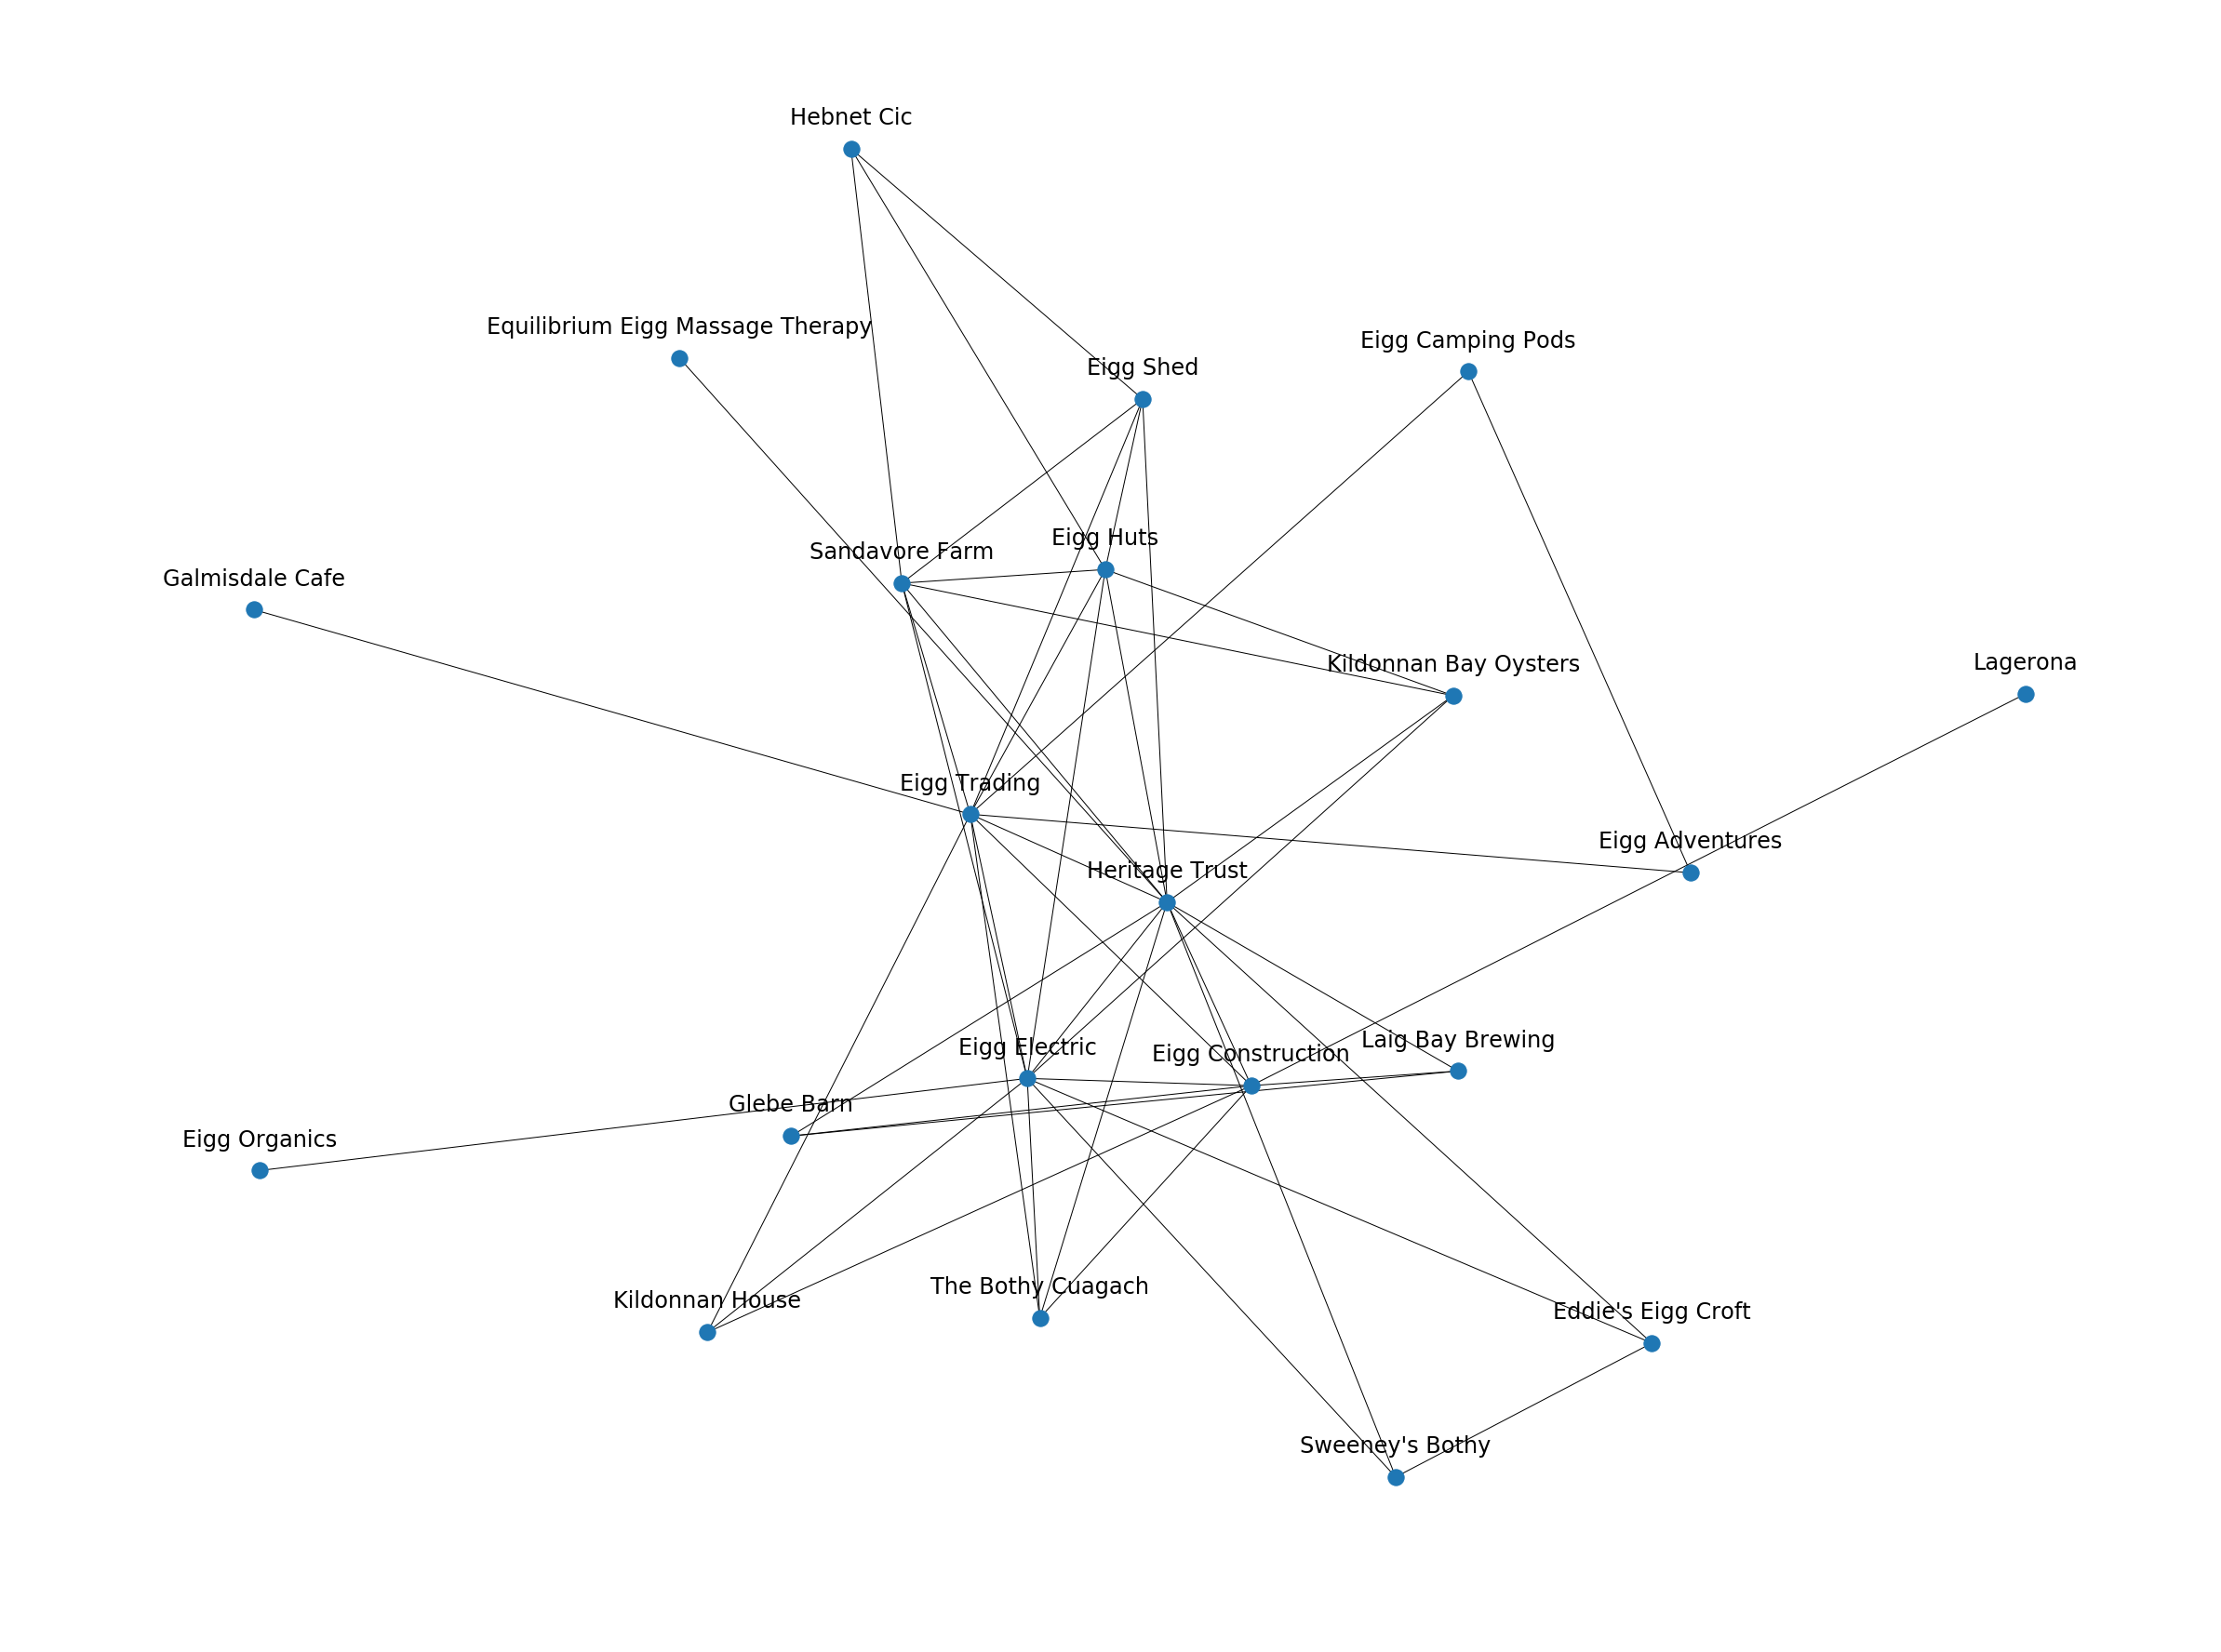

In [6]:
data = ownershipGraph()
G,labels = buildBusinessGraph(data)
remove = [node for node,degree in G.degree() if degree == 0]
G.remove_nodes_from(remove)
plotGraph(G,labels)

# Political network

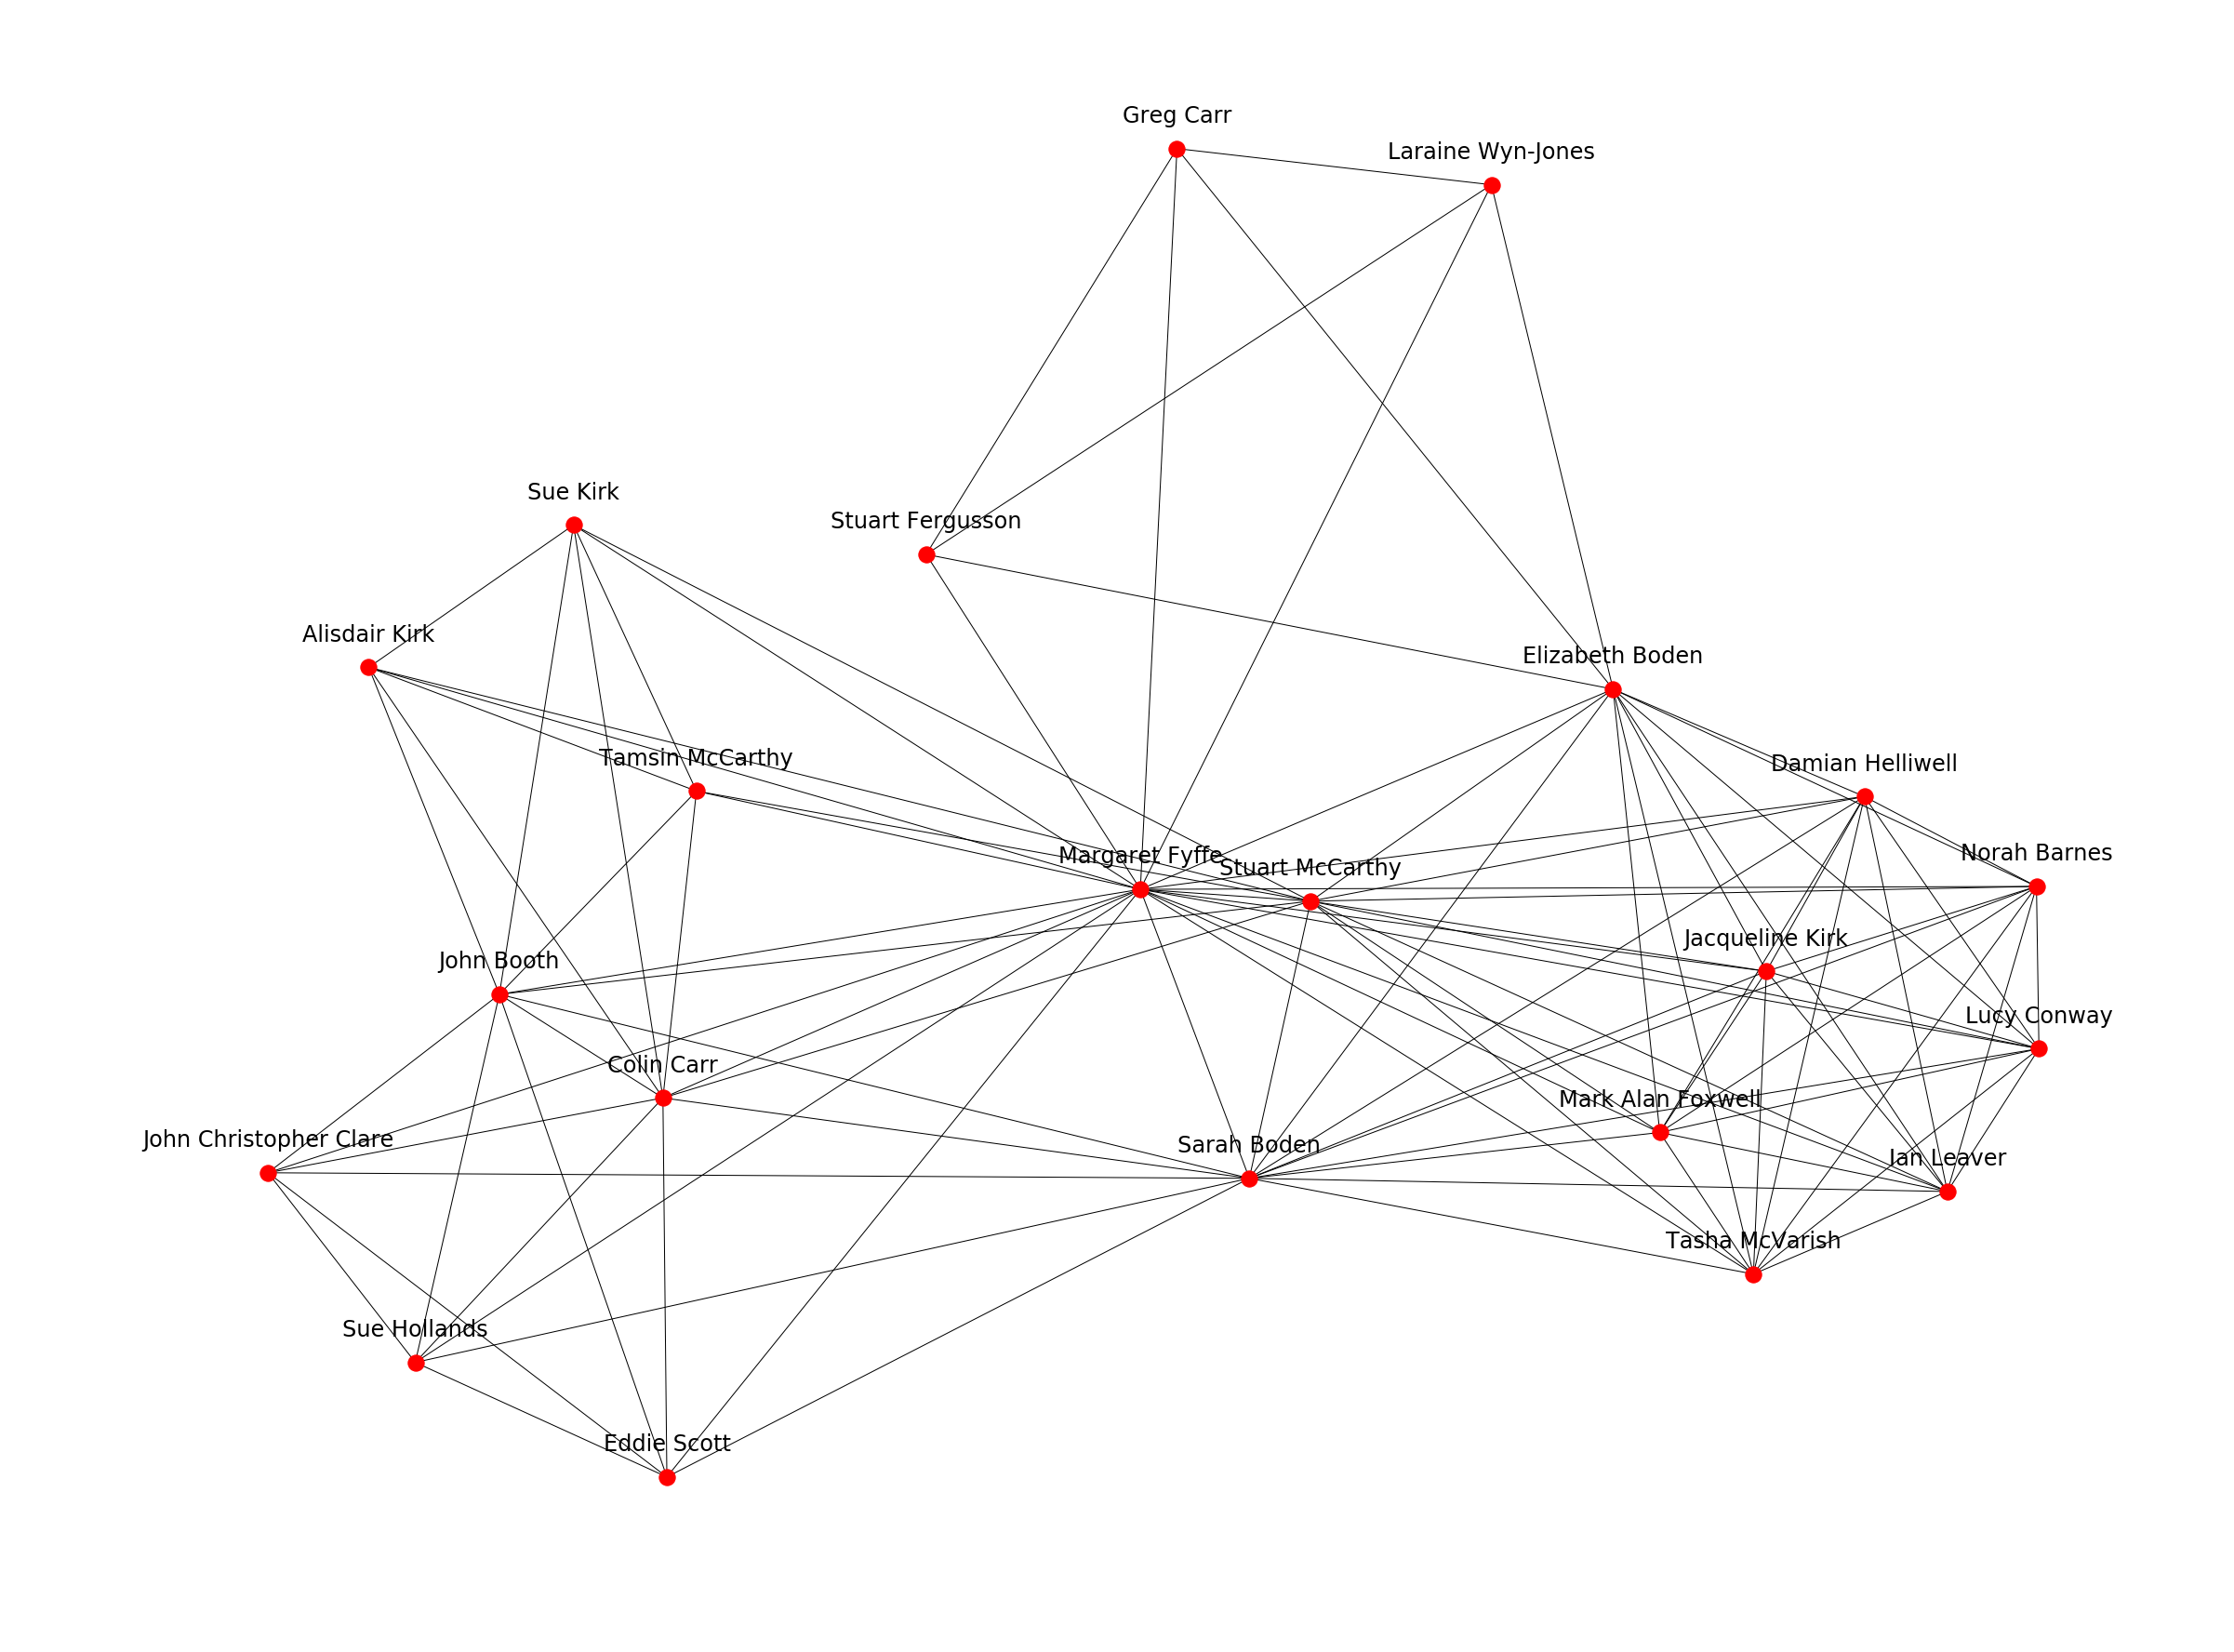

In [24]:
data = politicalNetwork()
G,labels = buildNamedBusinessGraph(data)
remove = [node for node,degree in G.degree() if degree == 0]
G.remove_nodes_from(remove)
plotGraph(G,labels, colors='red')

In [13]:
def poliFn(companiesForPerson):
    buildStr = ""
    buildStr += str(int("Heritage Trust" in companiesForPerson)) + " "
    buildStr += str(int("Eigg Electric" in companiesForPerson)) + " "
    buildStr += str(int("Eigg Construction" in companiesForPerson)) + " "
    buildStr += str(int("Eigg Trading" in companiesForPerson))
    
    return buildStr

def saveComplexPoliticalAttributes(G,dataDict):
    labelsInOrder = list(G.nodes())
    attributesInOrder = list(map(lambda x: poliFn(dataDict[x]),G.nodes()))
    np.savetxt('privateNetAttrLabels.txt', labelsInOrder, '%s')
    np.savetxt('privateNetAttrAttributes.txt', attributesInOrder, "%s")

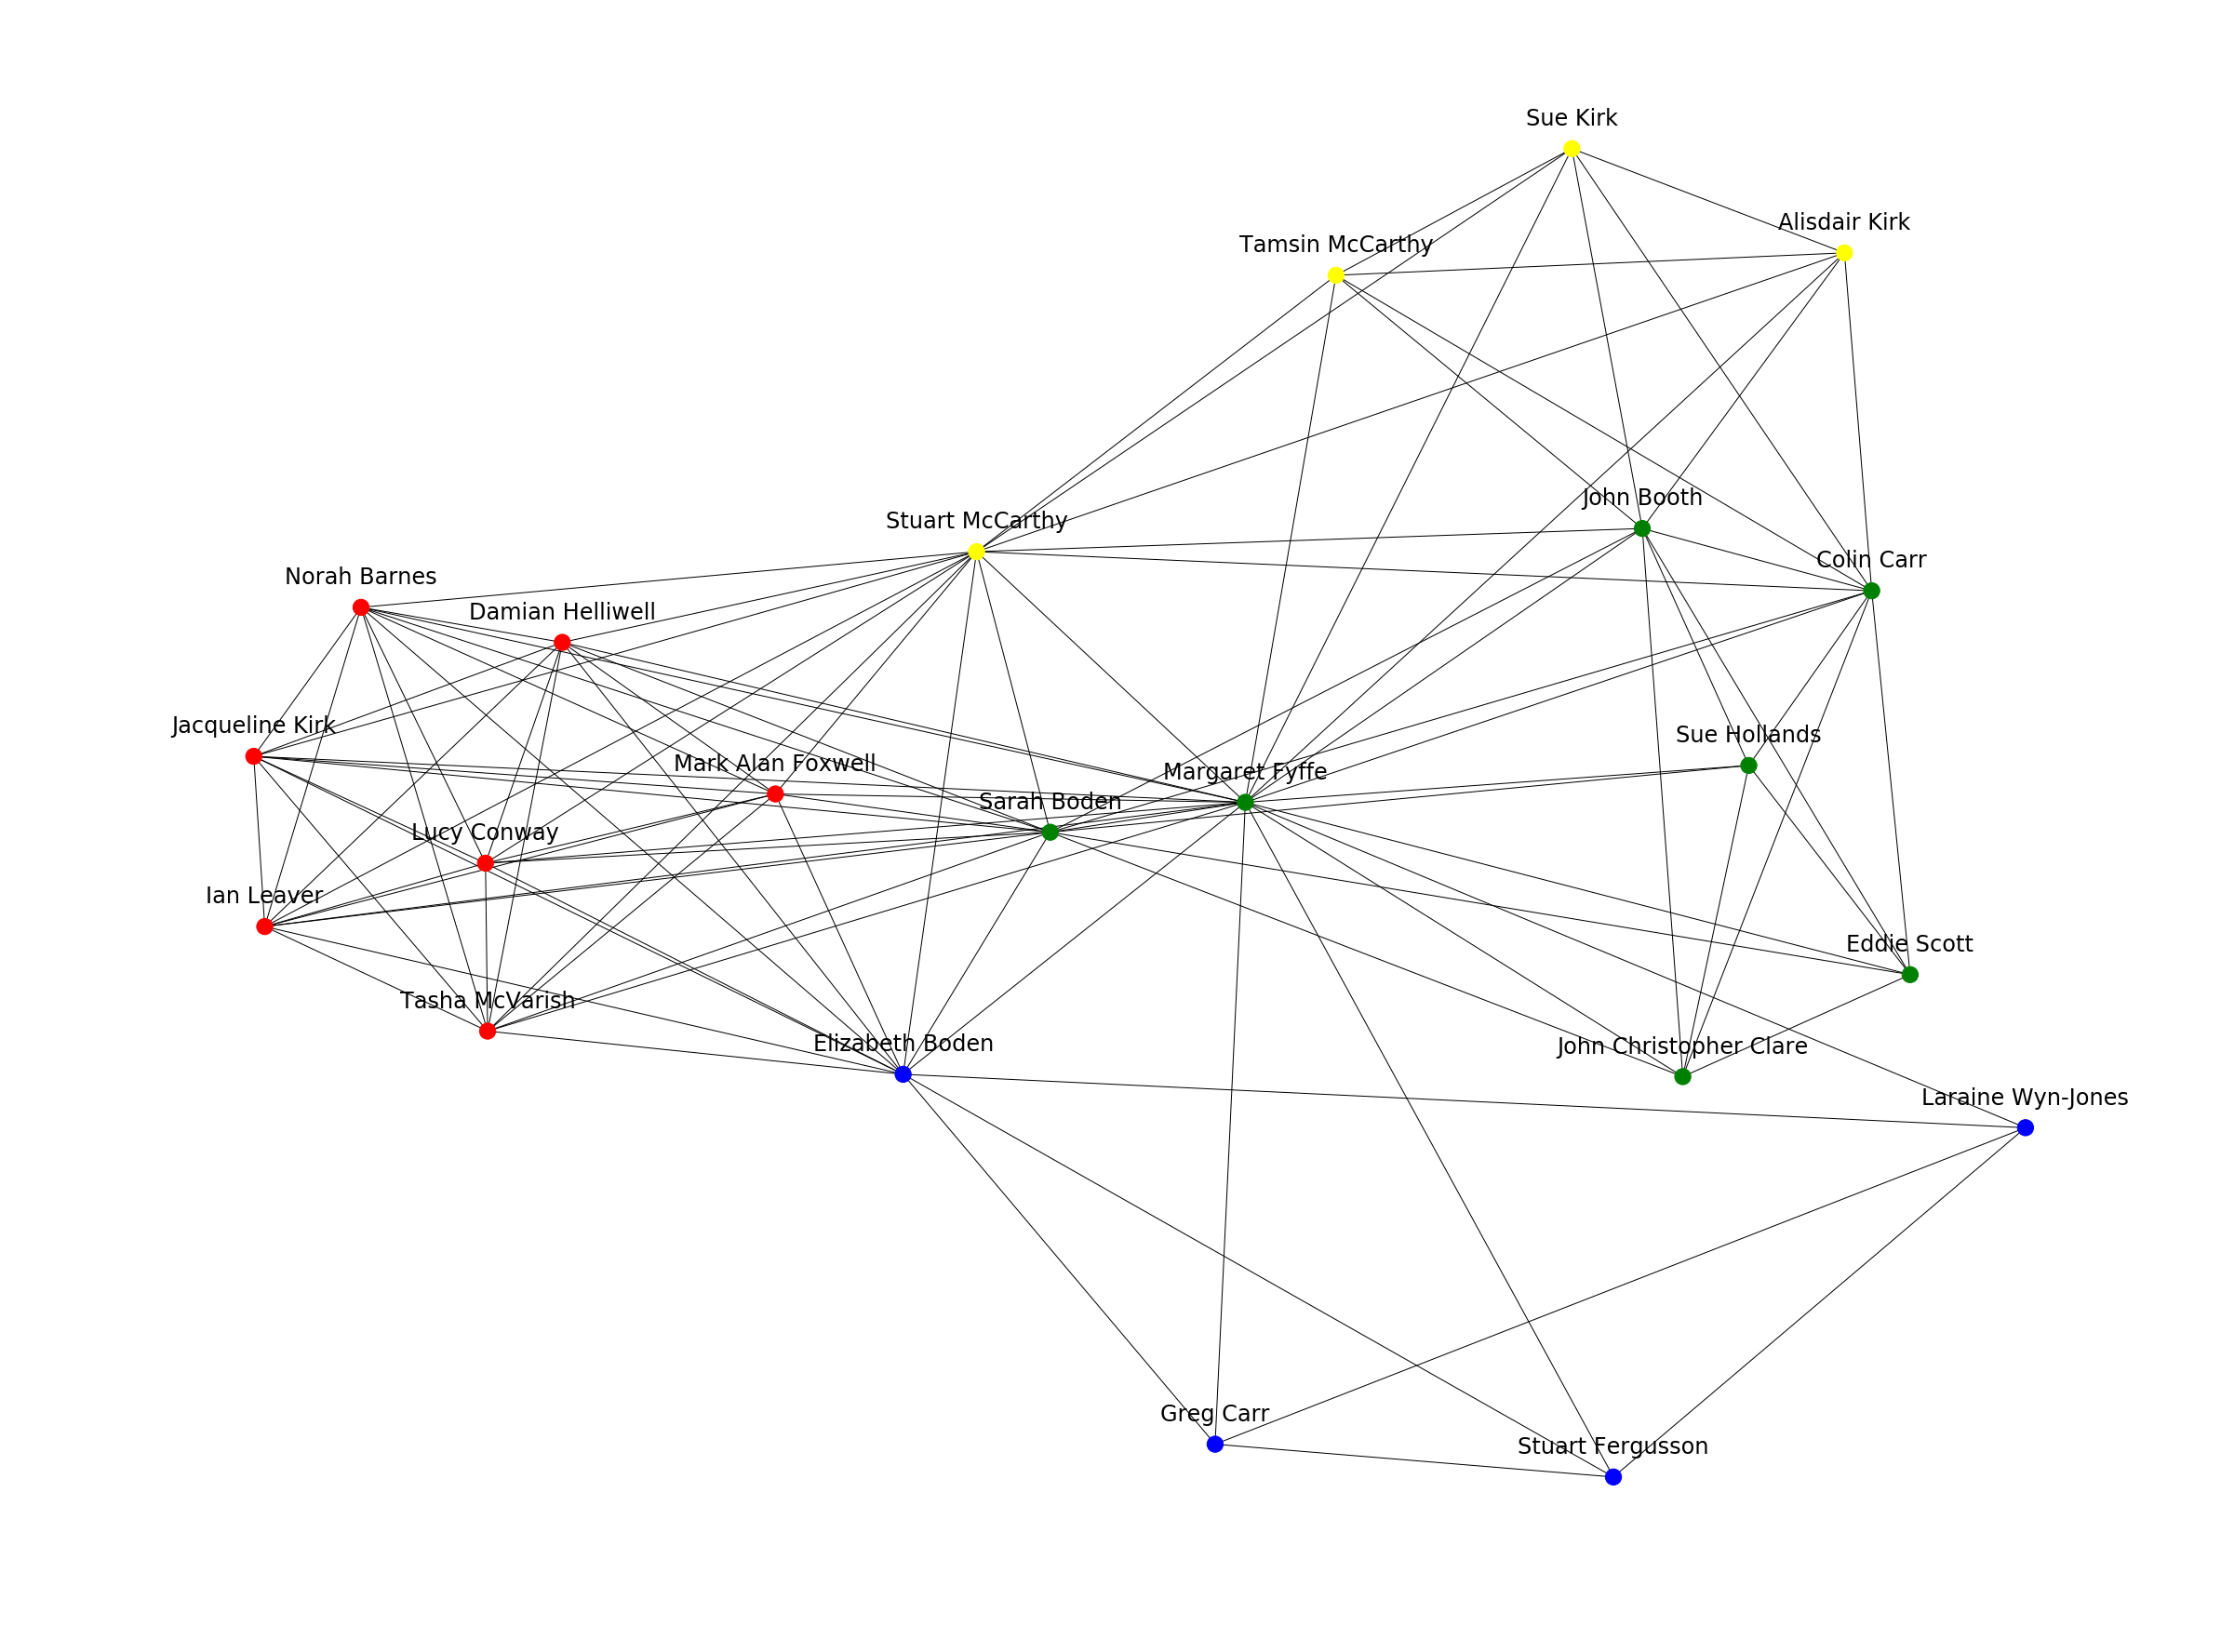

In [14]:
inTourism = involvedInTourism()
data = politicalNetwork()
G,labels = buildNamedBusinessGraph(data)
remove = [node for node,degree in G.degree() if degree == 0]
G.remove_nodes_from(remove)
colors = ["green" if "Eigg Electric" in data[x] else "blue" if "Eigg Trading" in data[x] else "yellow" if "Eigg Construction" in data[x] else "red"  for x in G.nodes()]
plotGraph(G,labels,colors)
saveComplexPoliticalAttributes(G,data)

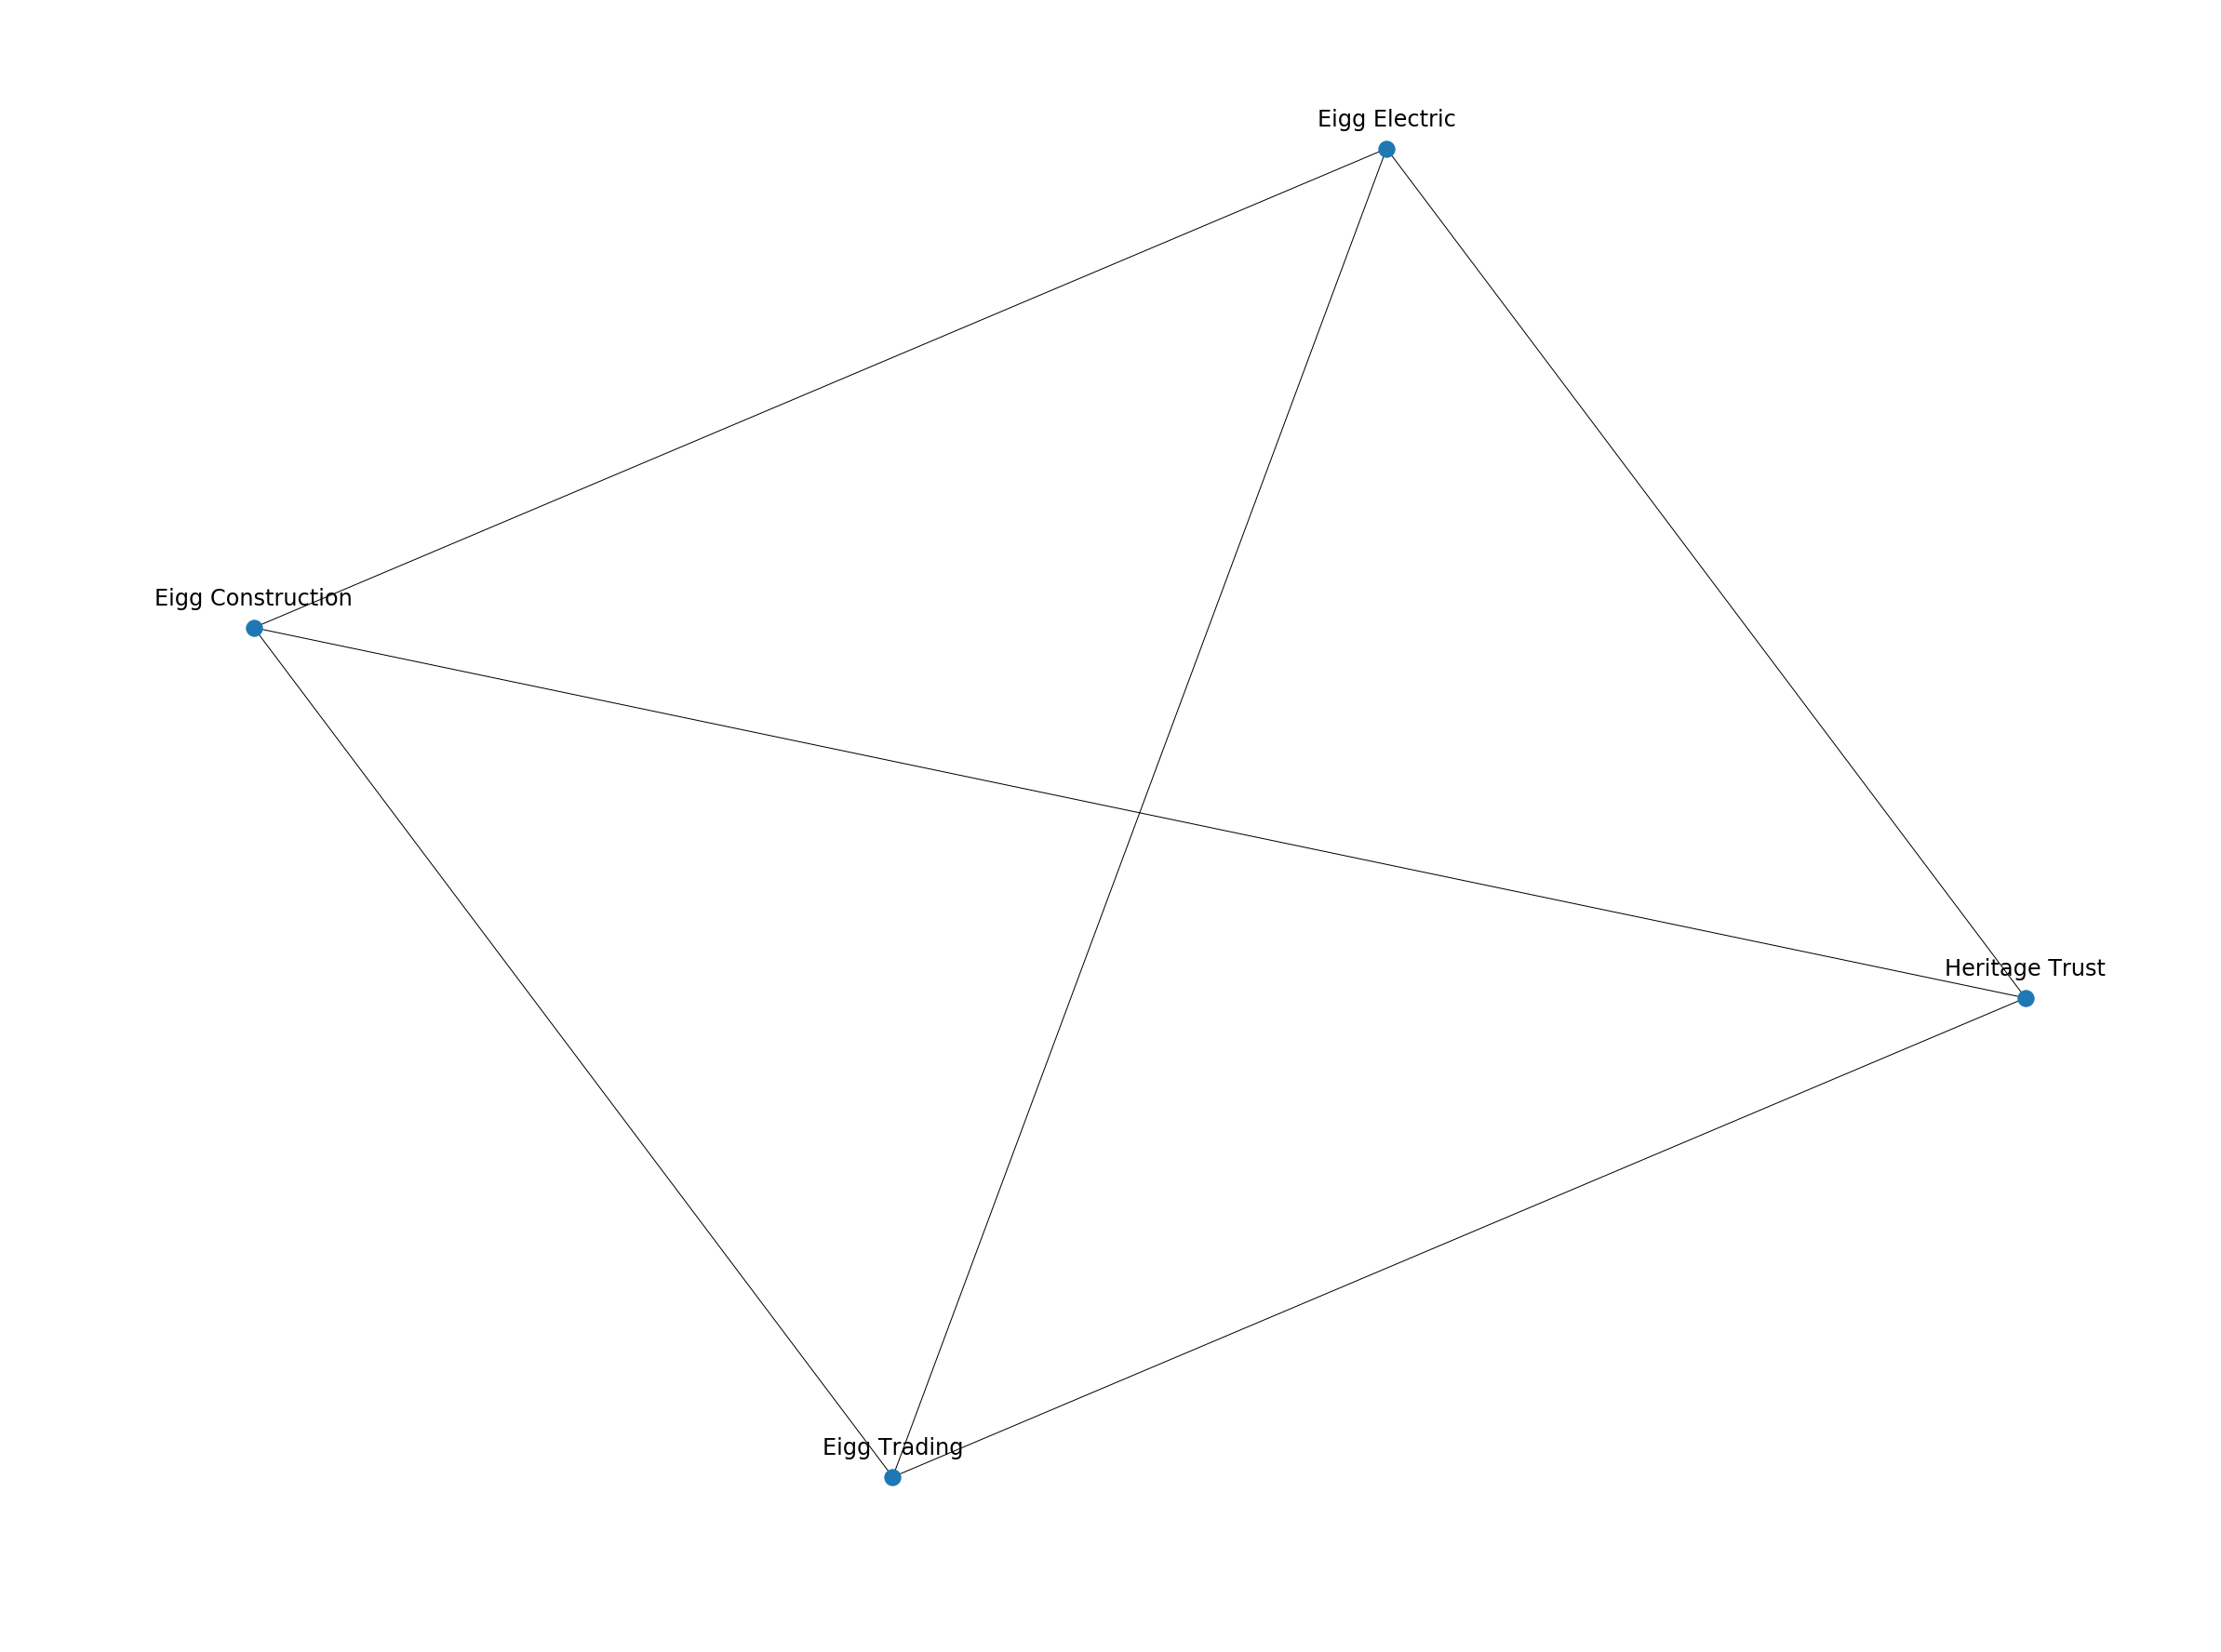

In [93]:
data = politicalNetwork()
G,labels = buildBusinessGraph(data)
remove = [node for node,degree in G.degree() if degree == 0]
G.remove_nodes_from(remove)
plotGraph(G,labels)

# Private Network

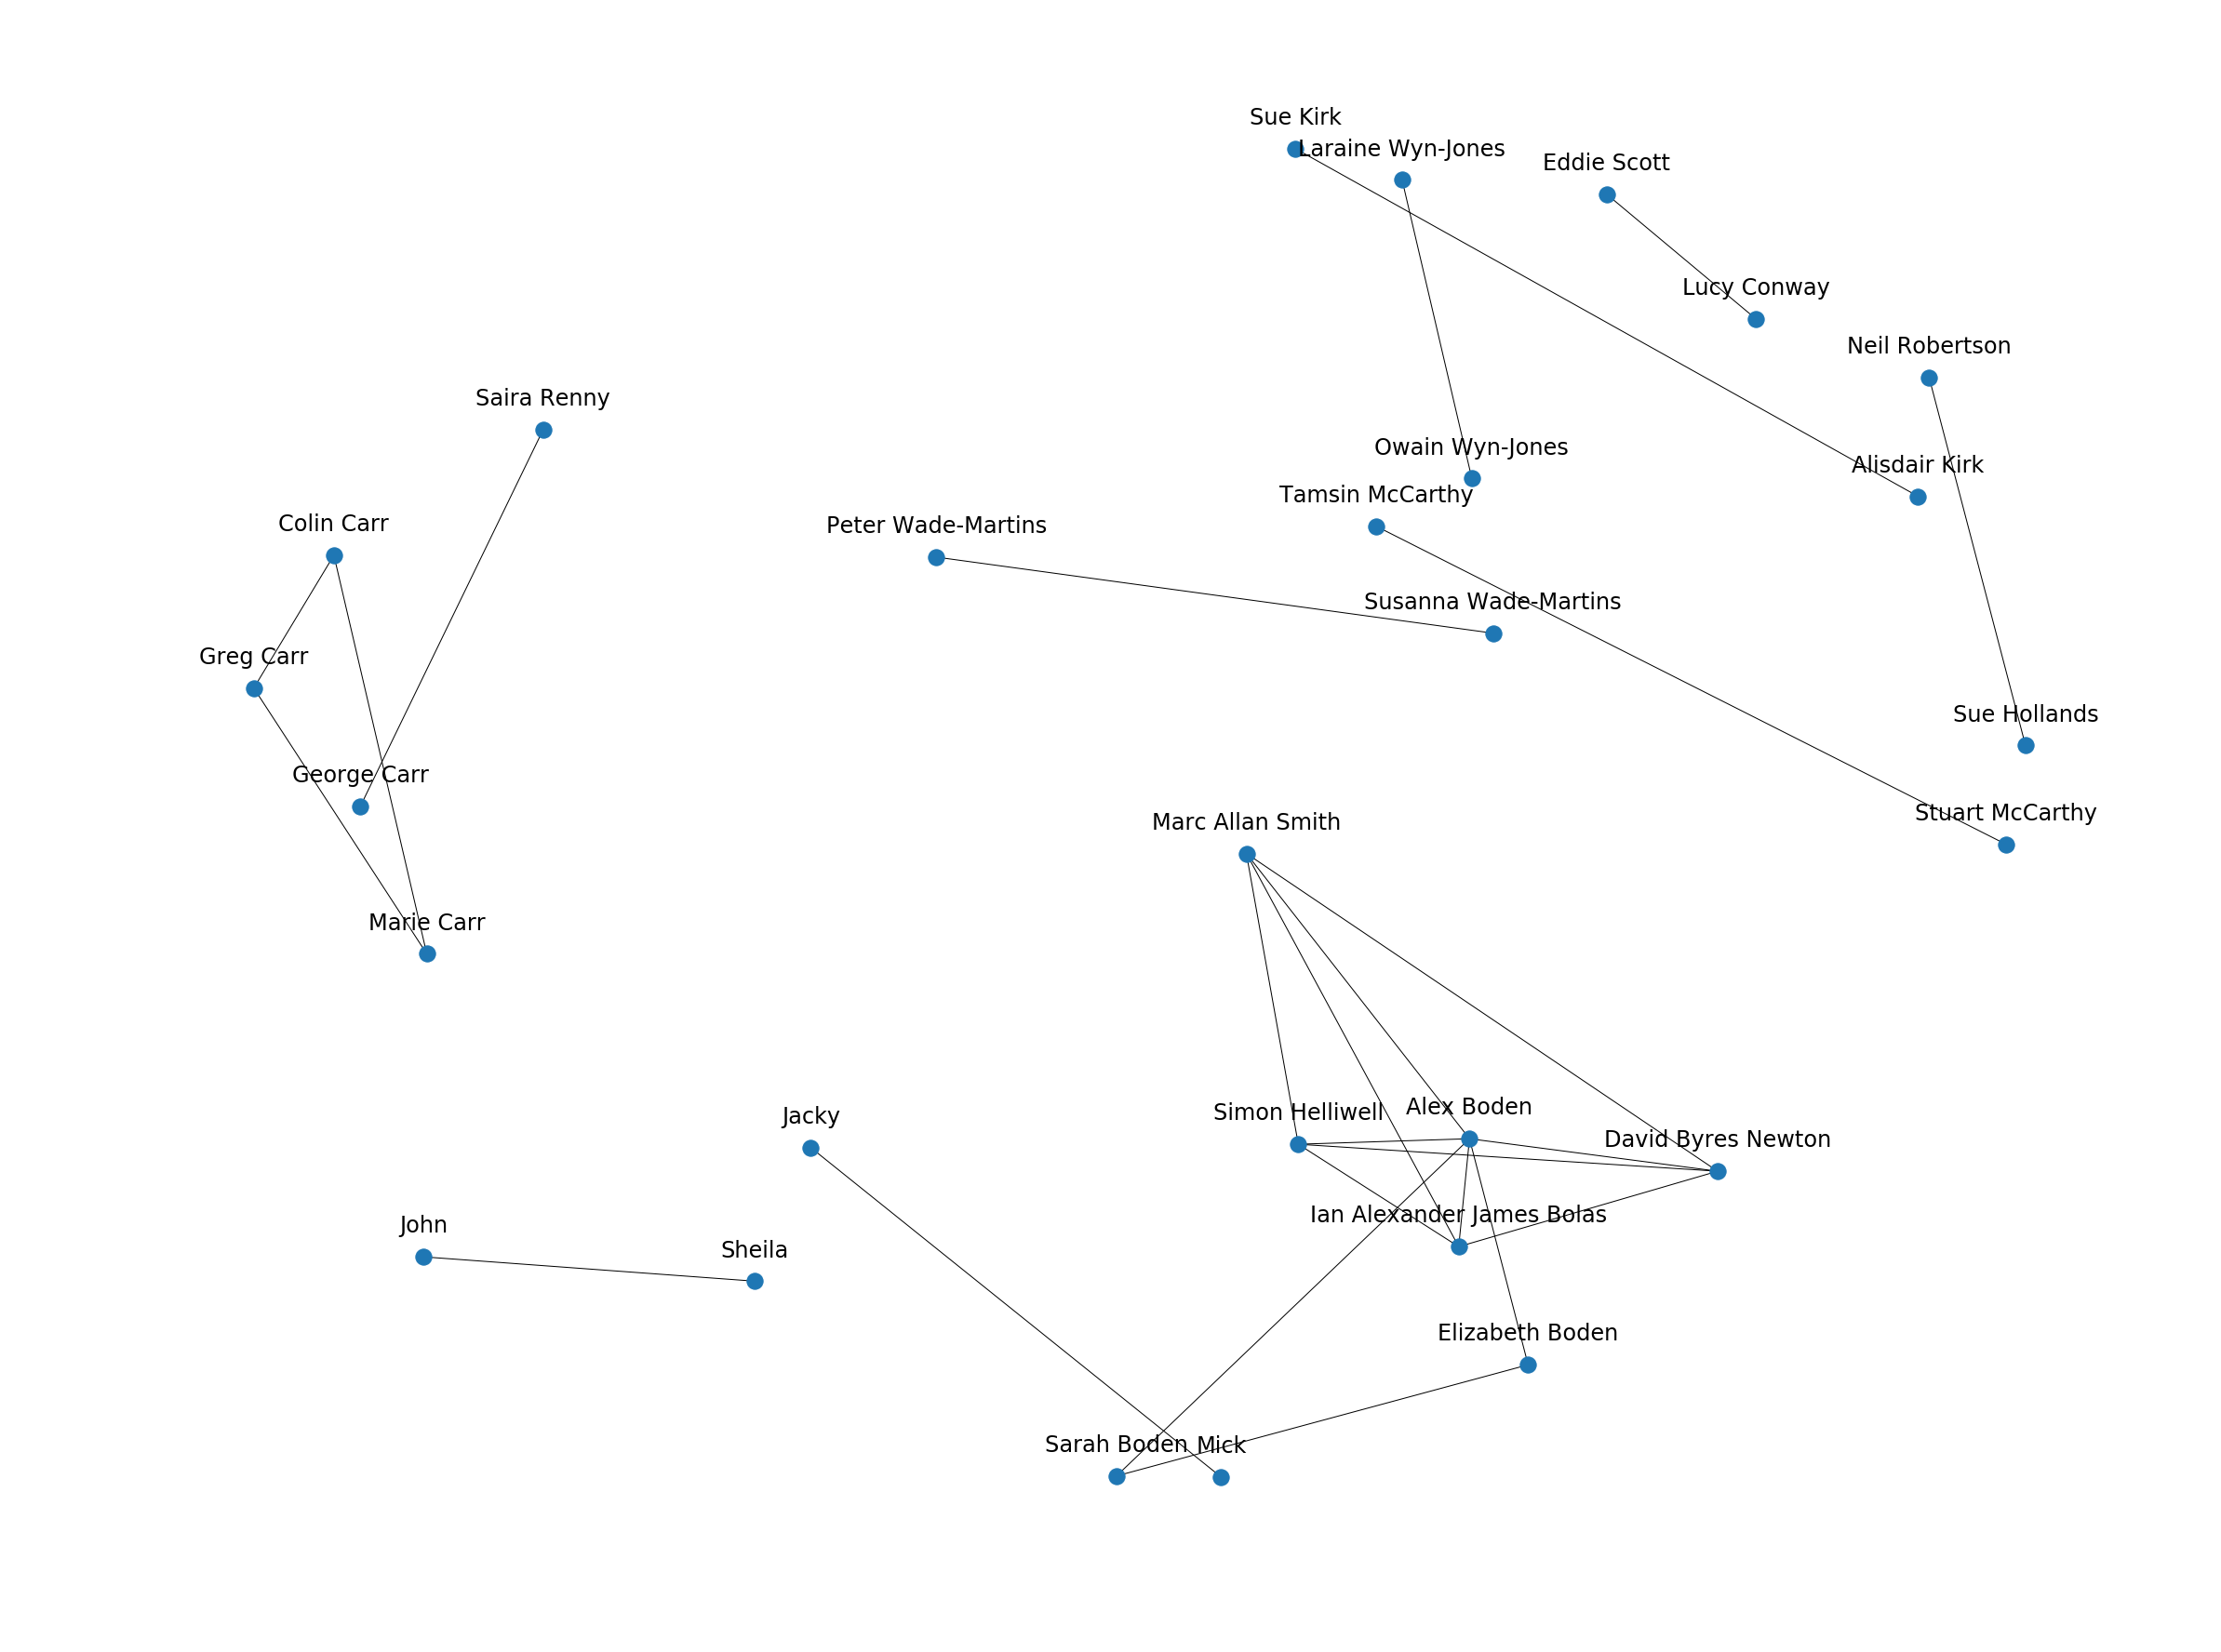

In [126]:
data = privateNetwork()
G,labels = buildNamedBusinessGraph(data)
remove = [node for node,degree in G.degree() if degree == 0]
G.remove_nodes_from(remove)
plotGraph(G,labels)

(28, 28)



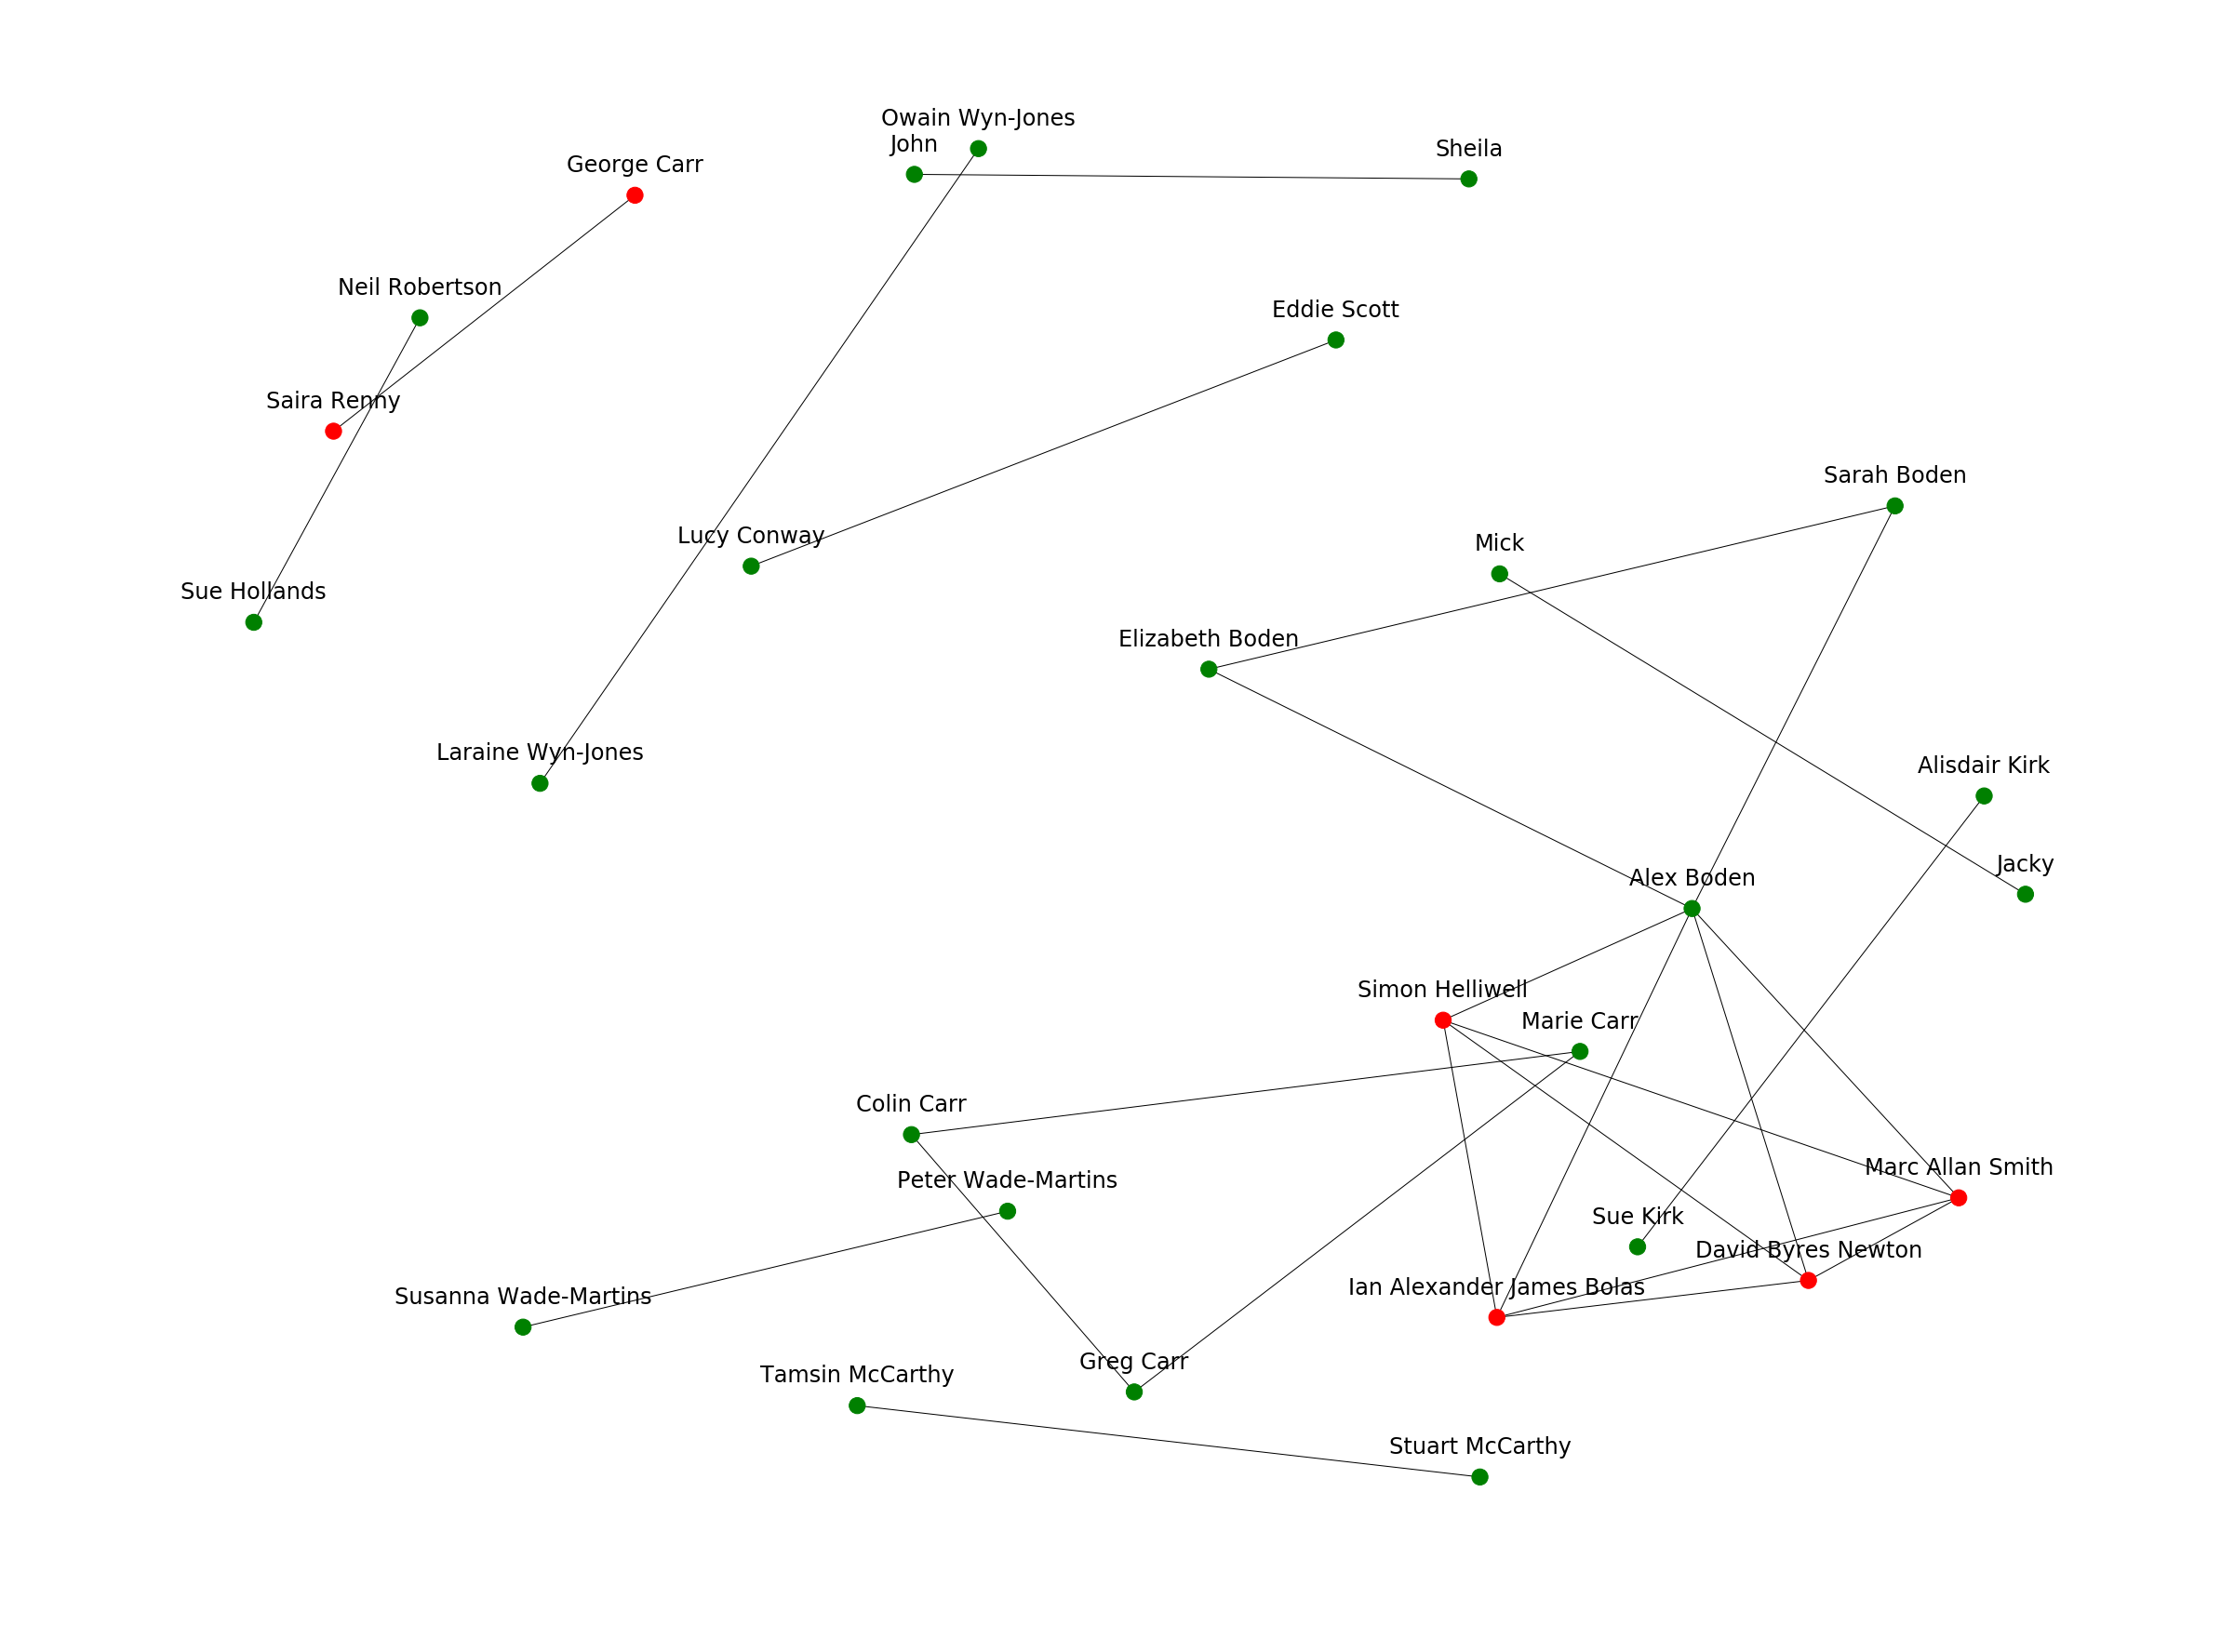

In [124]:
inTourism = involvedInTourism()
data = privateNetwork()
G,labels = buildNamedBusinessGraph(data)
remove = [node for node,degree in G.degree() if degree == 0]
G.remove_nodes_from(remove)
colors = ["red" if inTourism[x] == 0 else "green" for x in G.nodes()]
plotGraph(G,labels,colors)

saveGraphToFile(G,'privateNetAttr.txt')
labelsInOrder = list(G.nodes())
attributesInOrder = list(map(lambda x: inTourism[x],G.nodes()))
np.savetxt('privateNetAttrLabels.txt', labelsInOrder, '%s')
np.savetxt('privateNetAttrAttributes.txt', attributesInOrder, "%s")

# Tourism Network

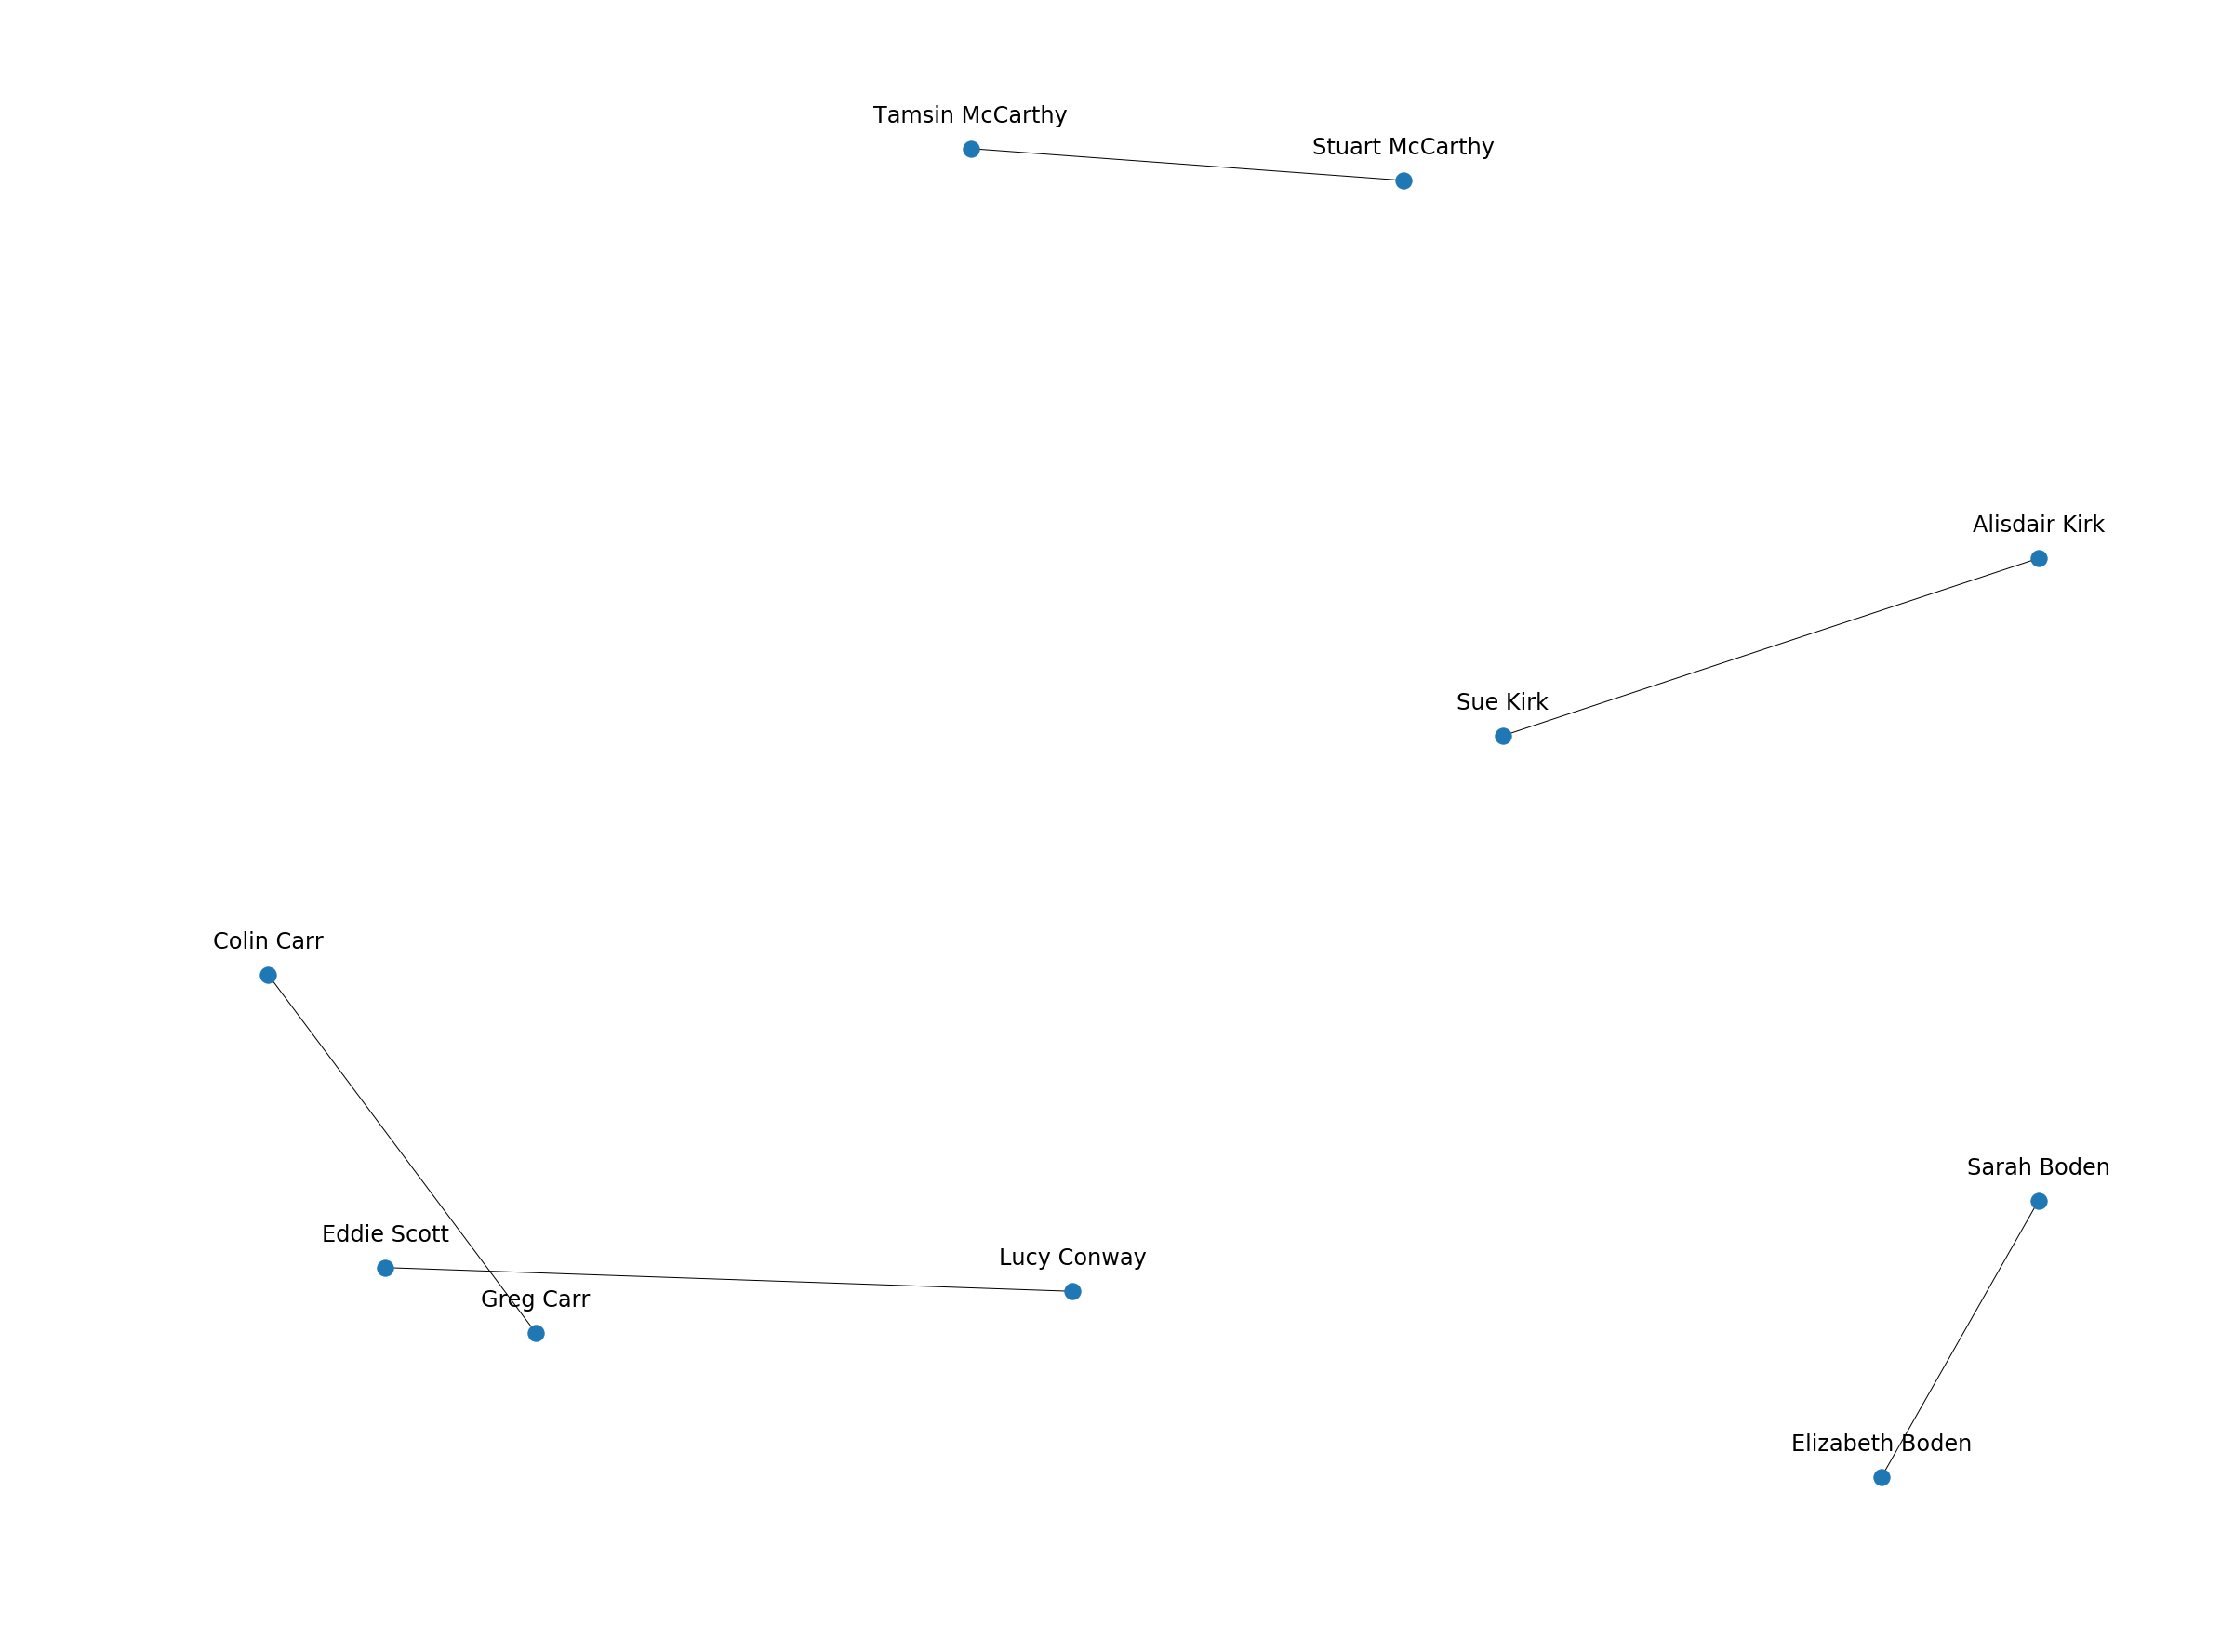

In [96]:
data = tourismNet()
G,labels = buildNamedBusinessGraph(data)
remove = [node for node,degree in G.degree() if degree == 0]
G.remove_nodes_from(remove)
plotGraph(G,labels)

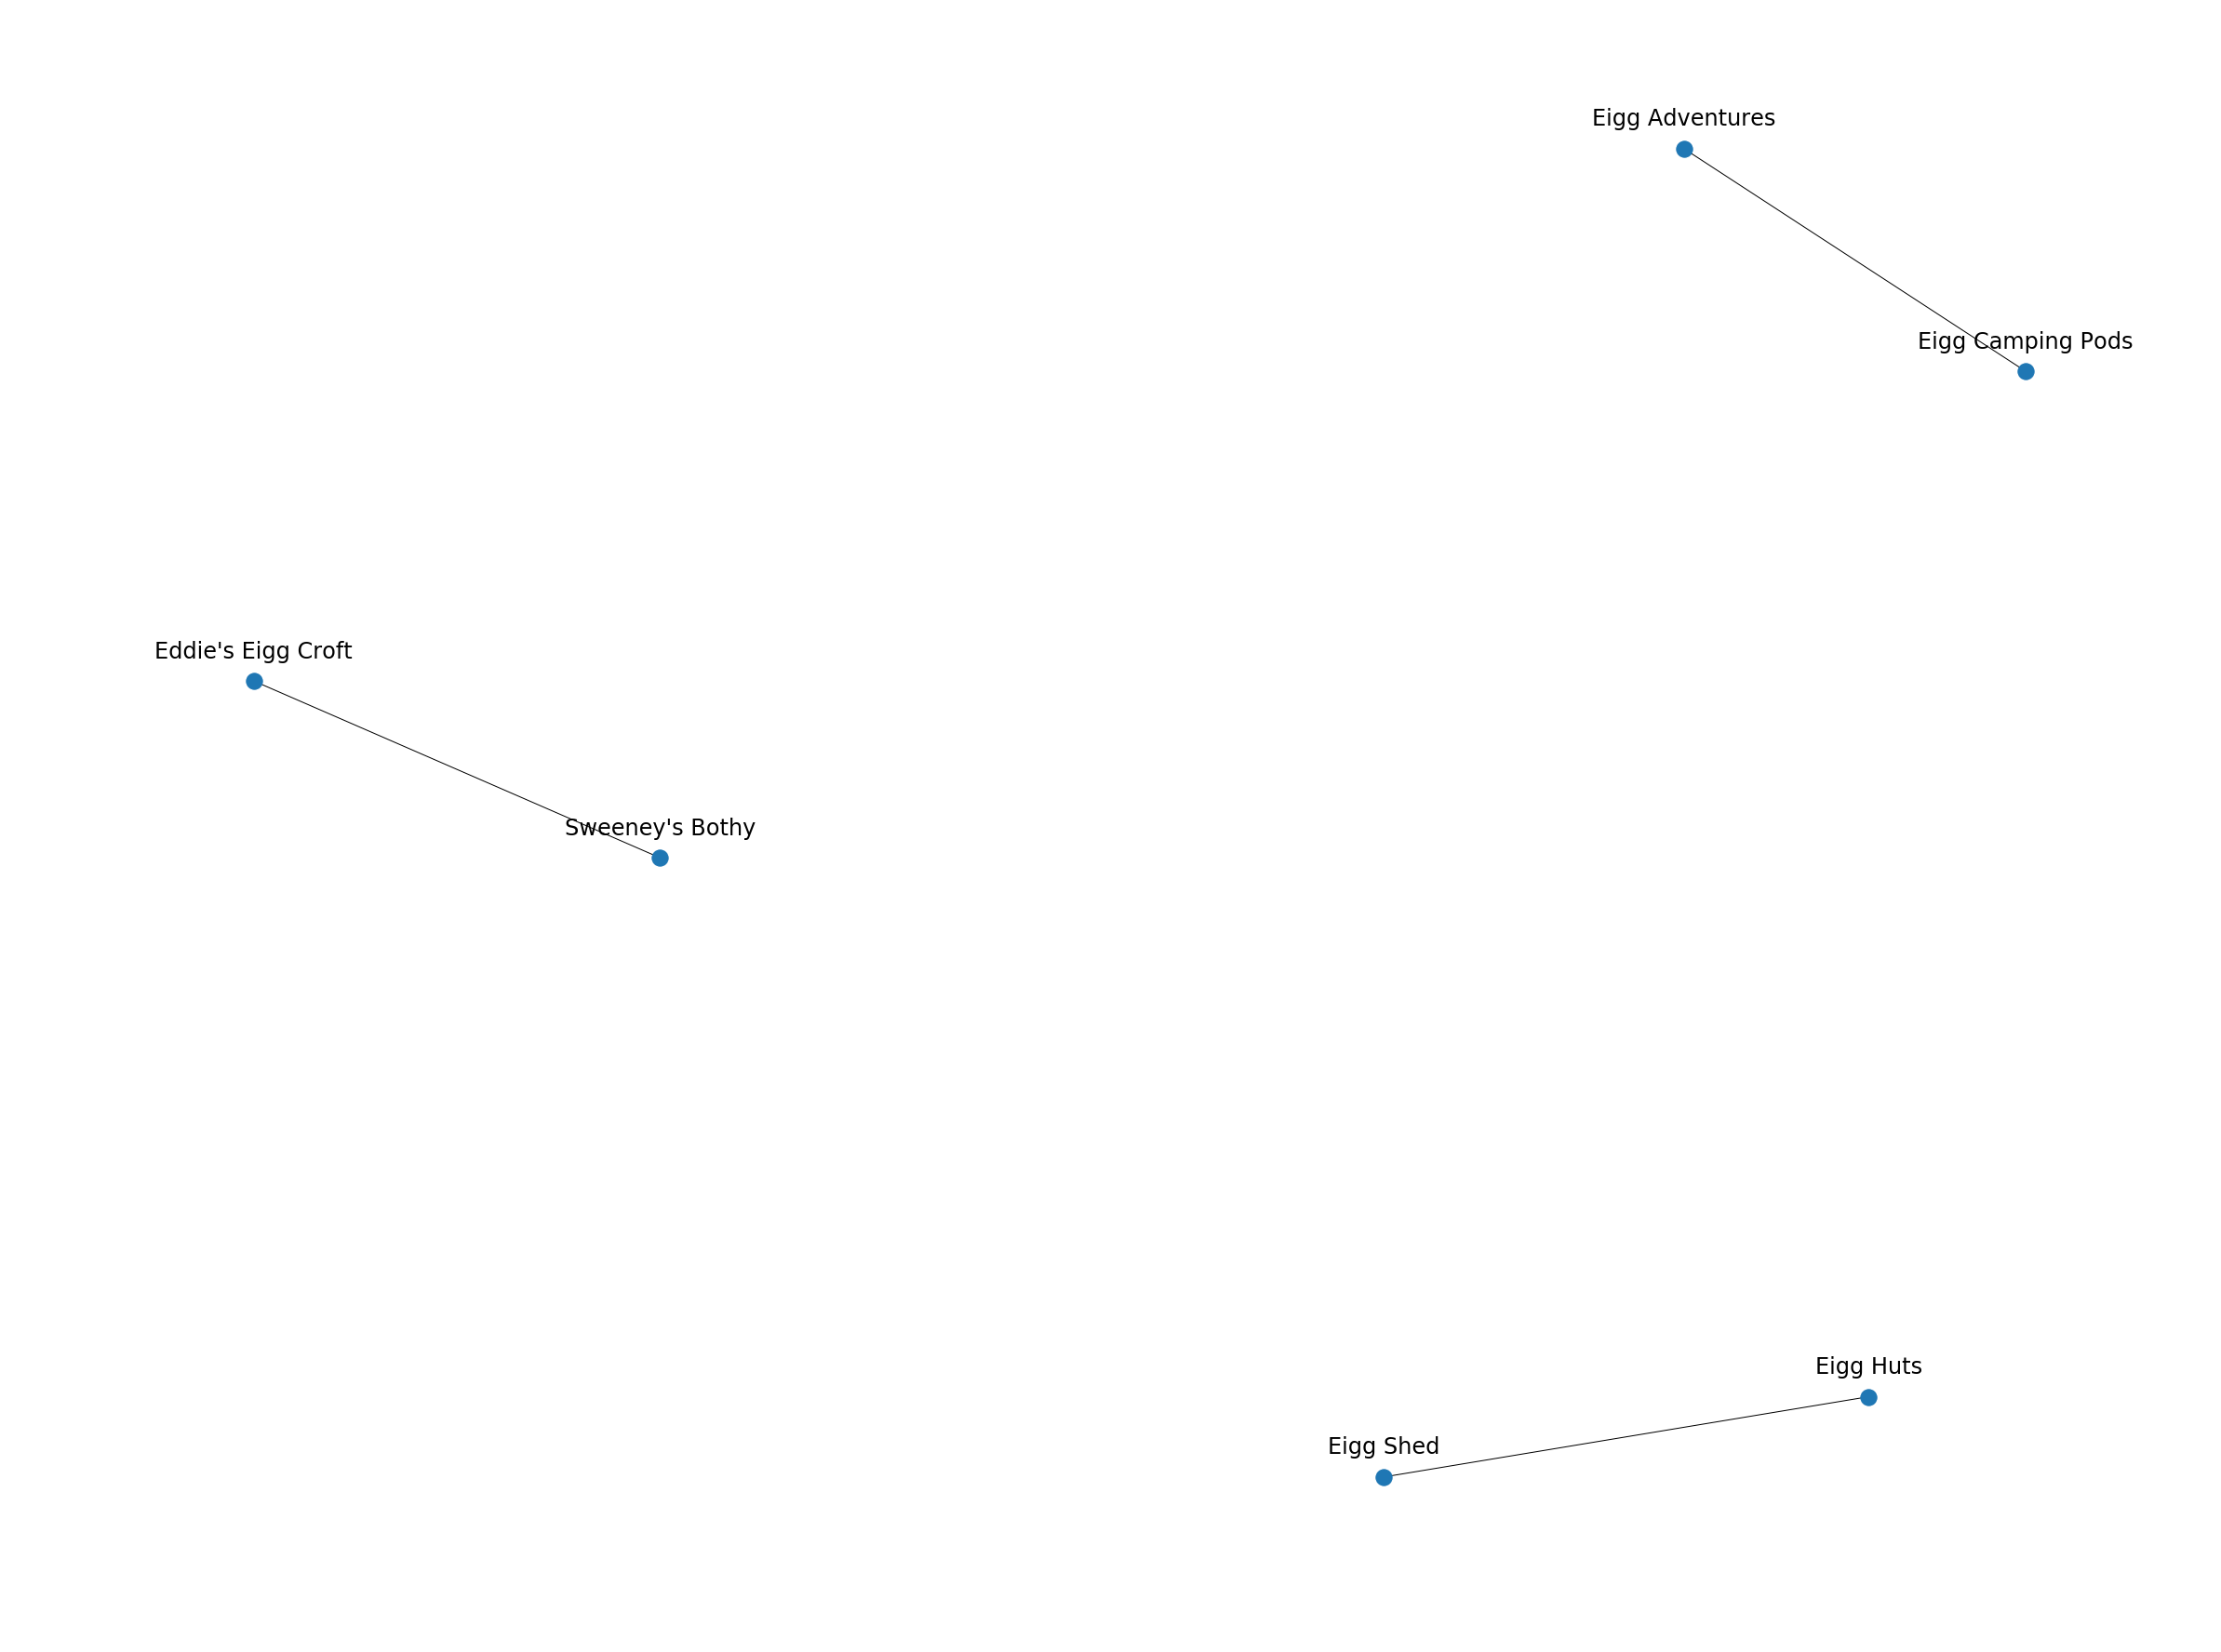

In [97]:
data = tourismNet()
G,labels = buildBusinessGraph(data)
remove = [node for node,degree in G.degree() if degree == 0]
G.remove_nodes_from(remove)
plotGraph(G,labels)

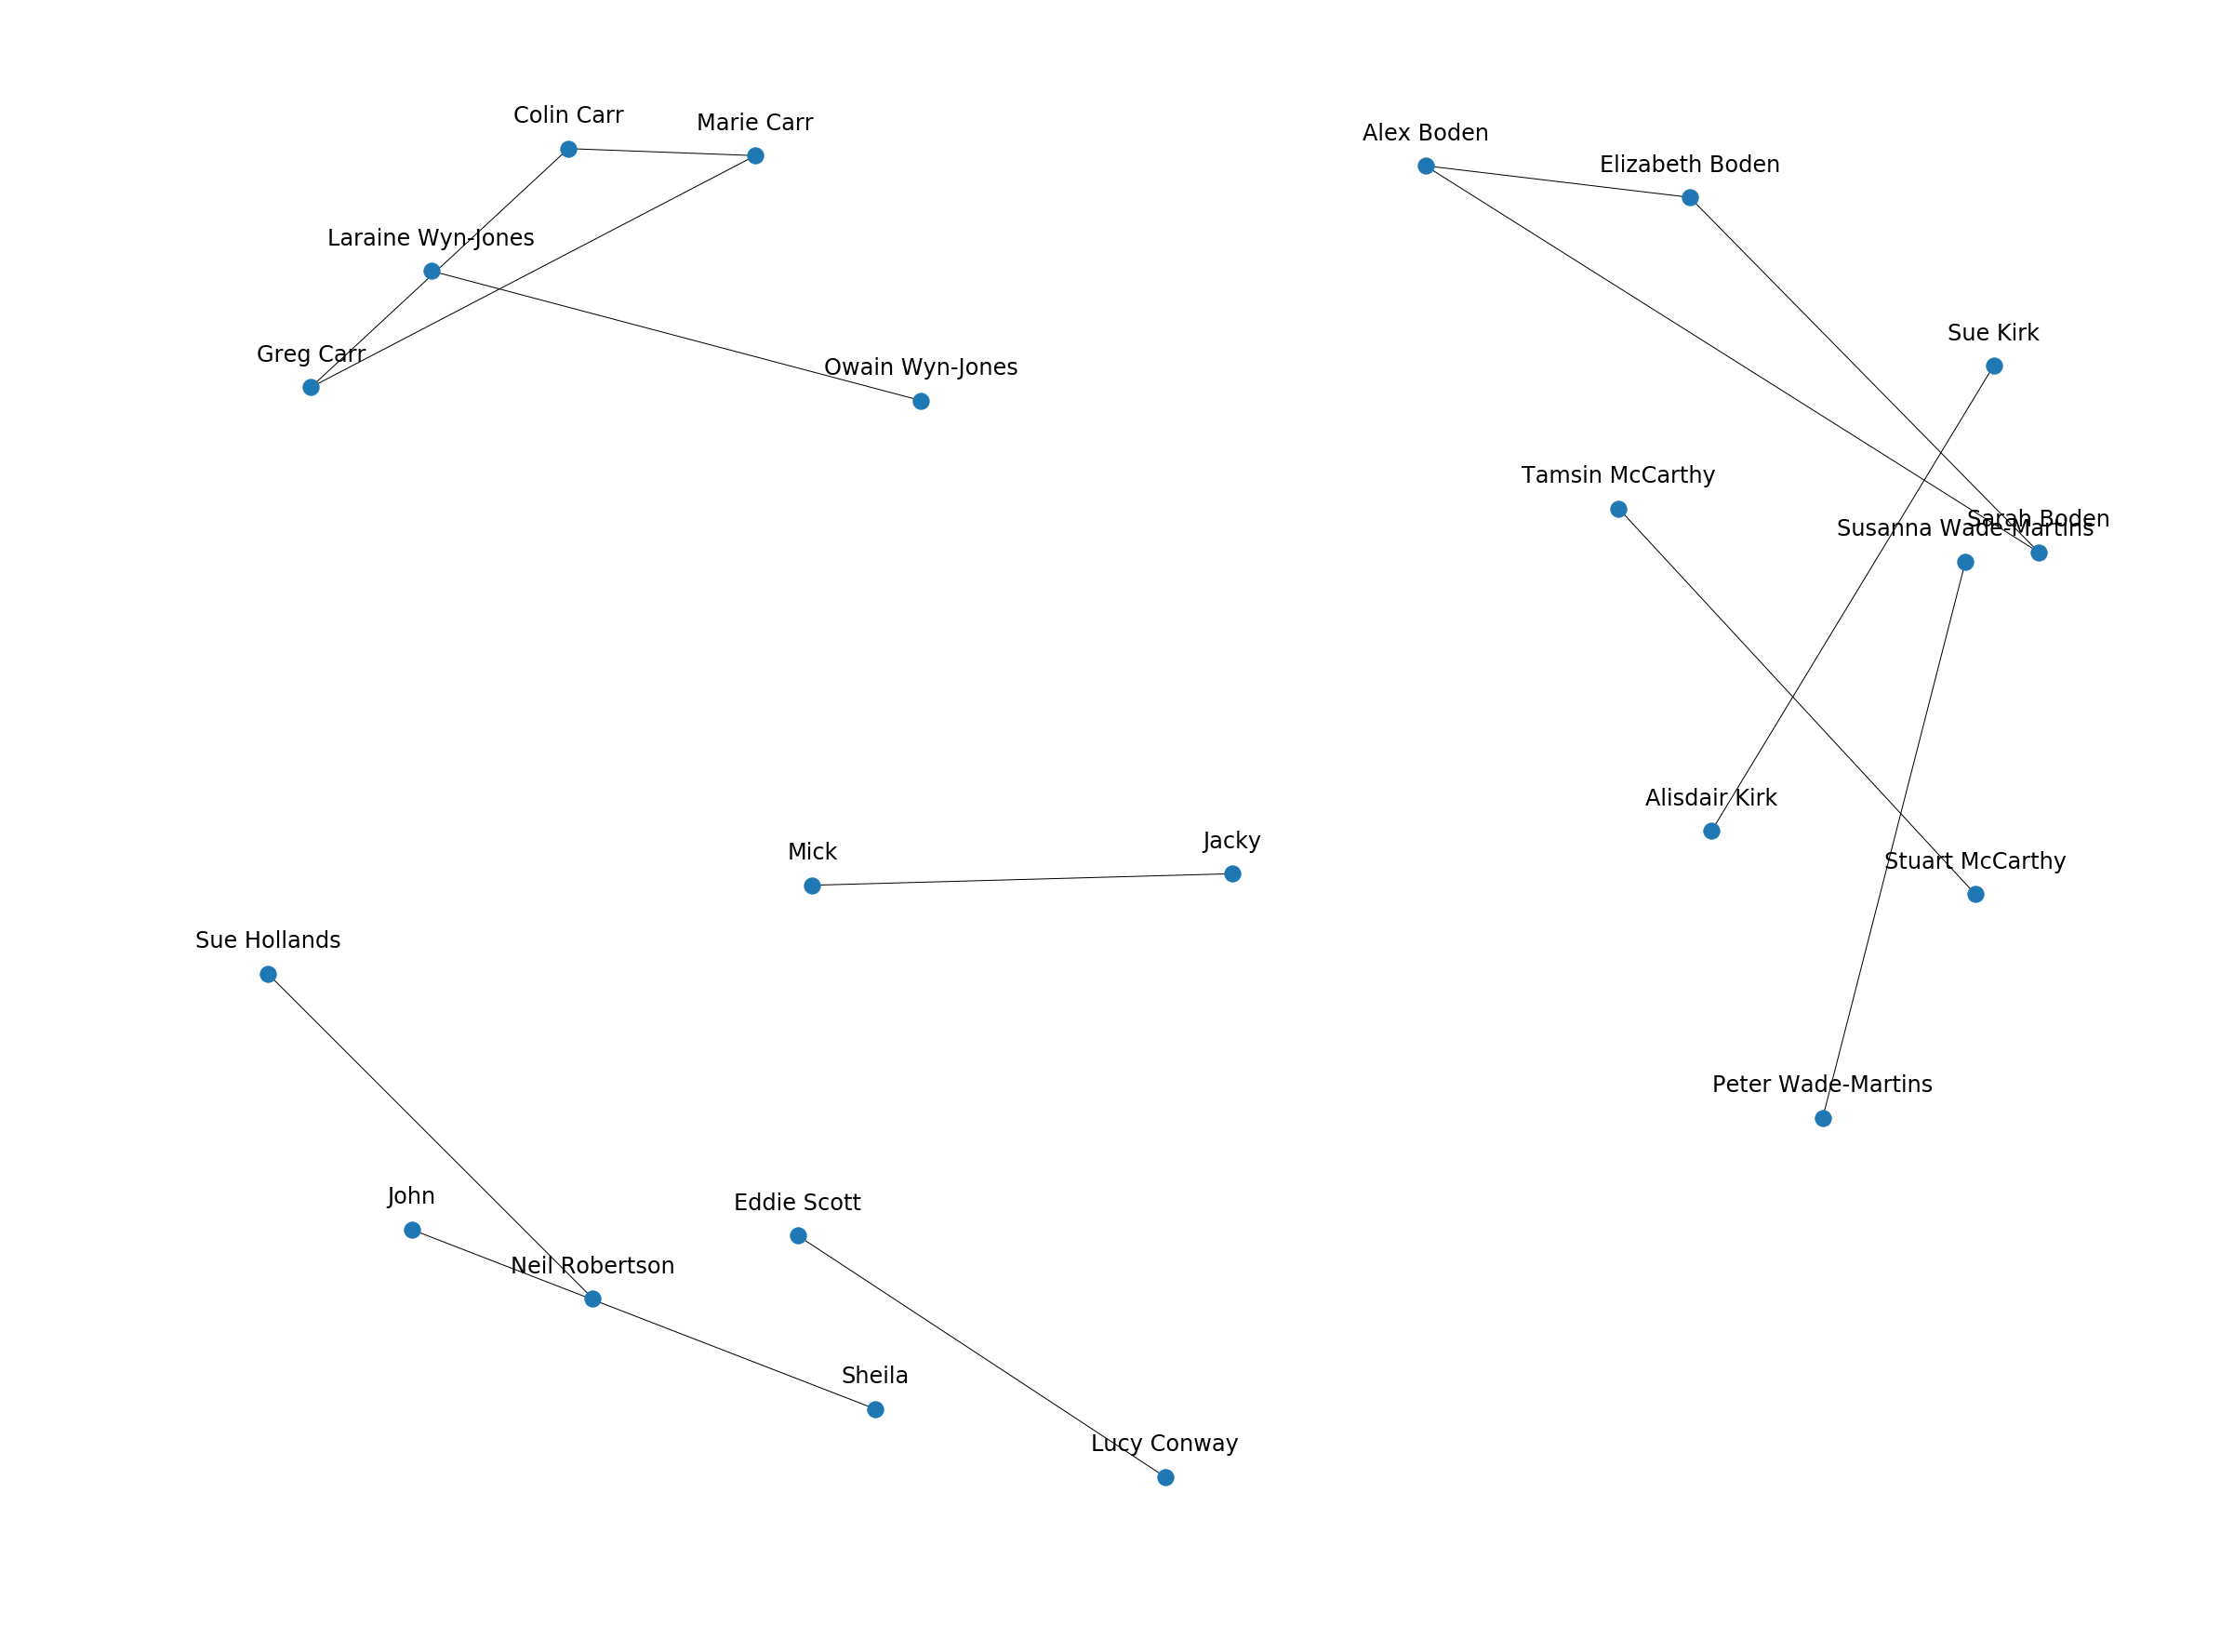

In [98]:
data = fullTourismNet()
G,labels = buildNamedBusinessGraph(data)
remove = [node for node,degree in G.degree() if degree == 0]
G.remove_nodes_from(remove)
plotGraph(G,labels)

# non tourism net

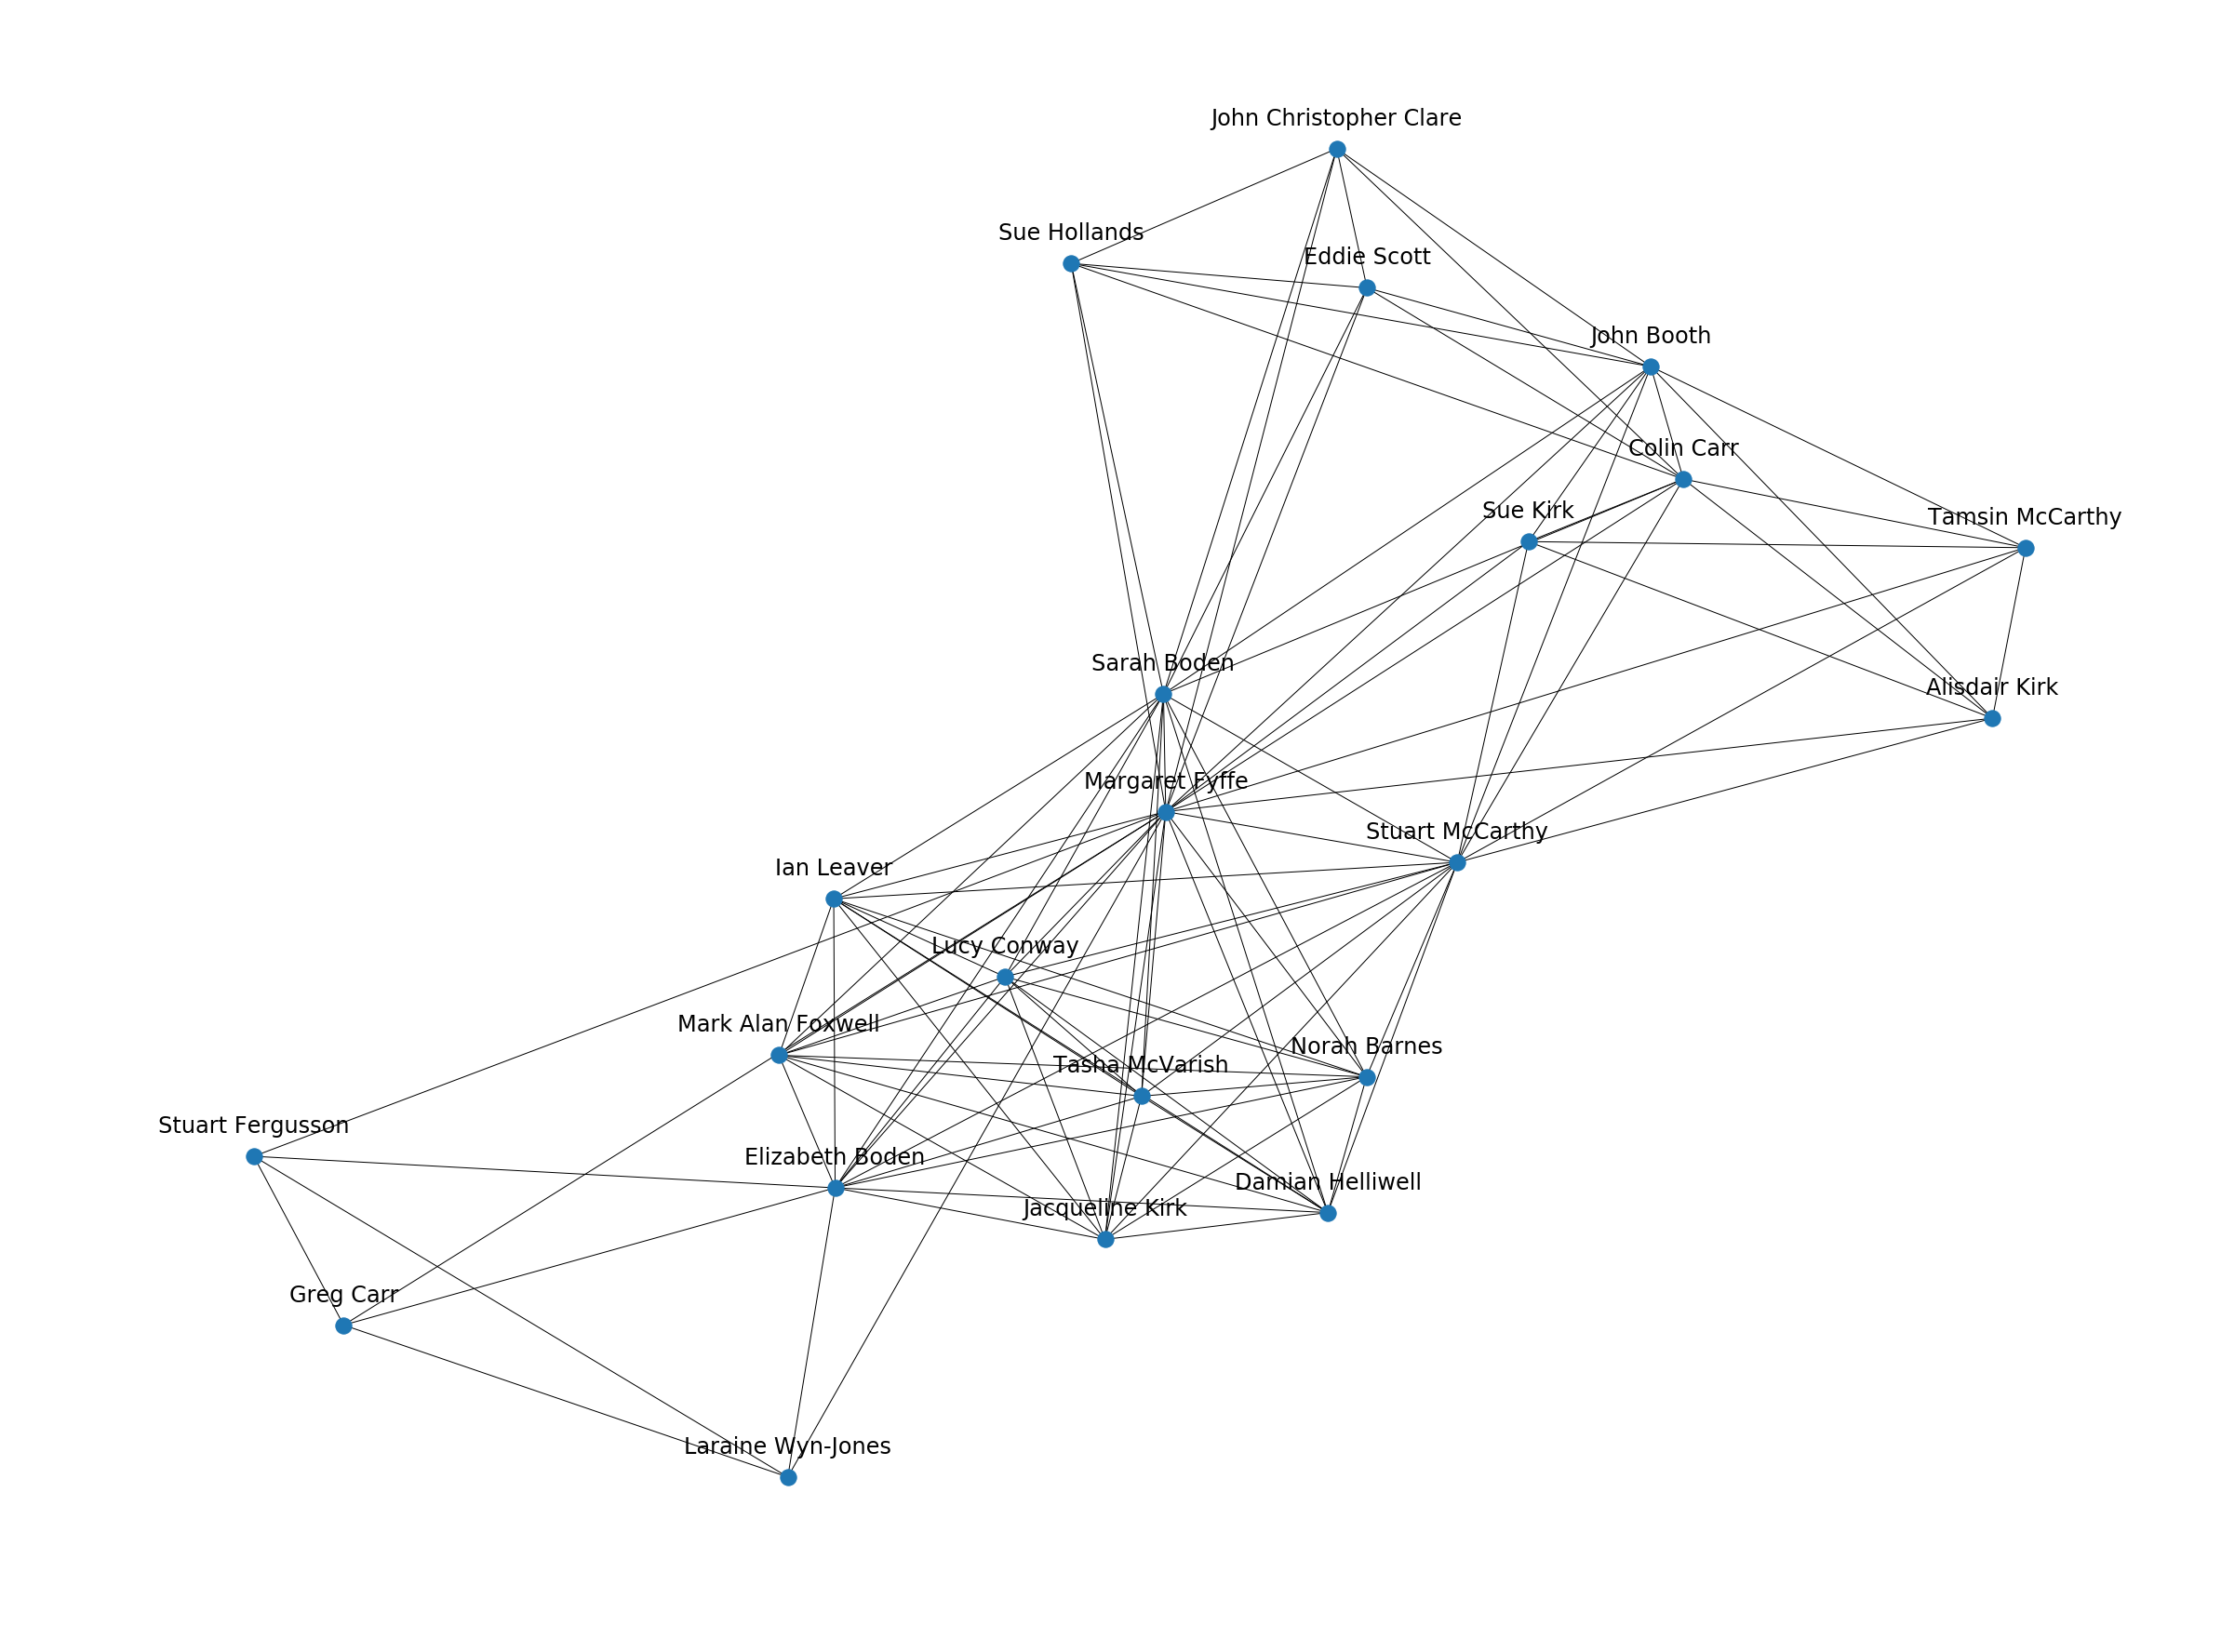

In [99]:
data = nonTourismNet()
G,labels = buildNamedBusinessGraph(data)
remove = [node for node,degree in G.degree() if degree == 0]
G.remove_nodes_from(remove)
plotGraph(G,labels)

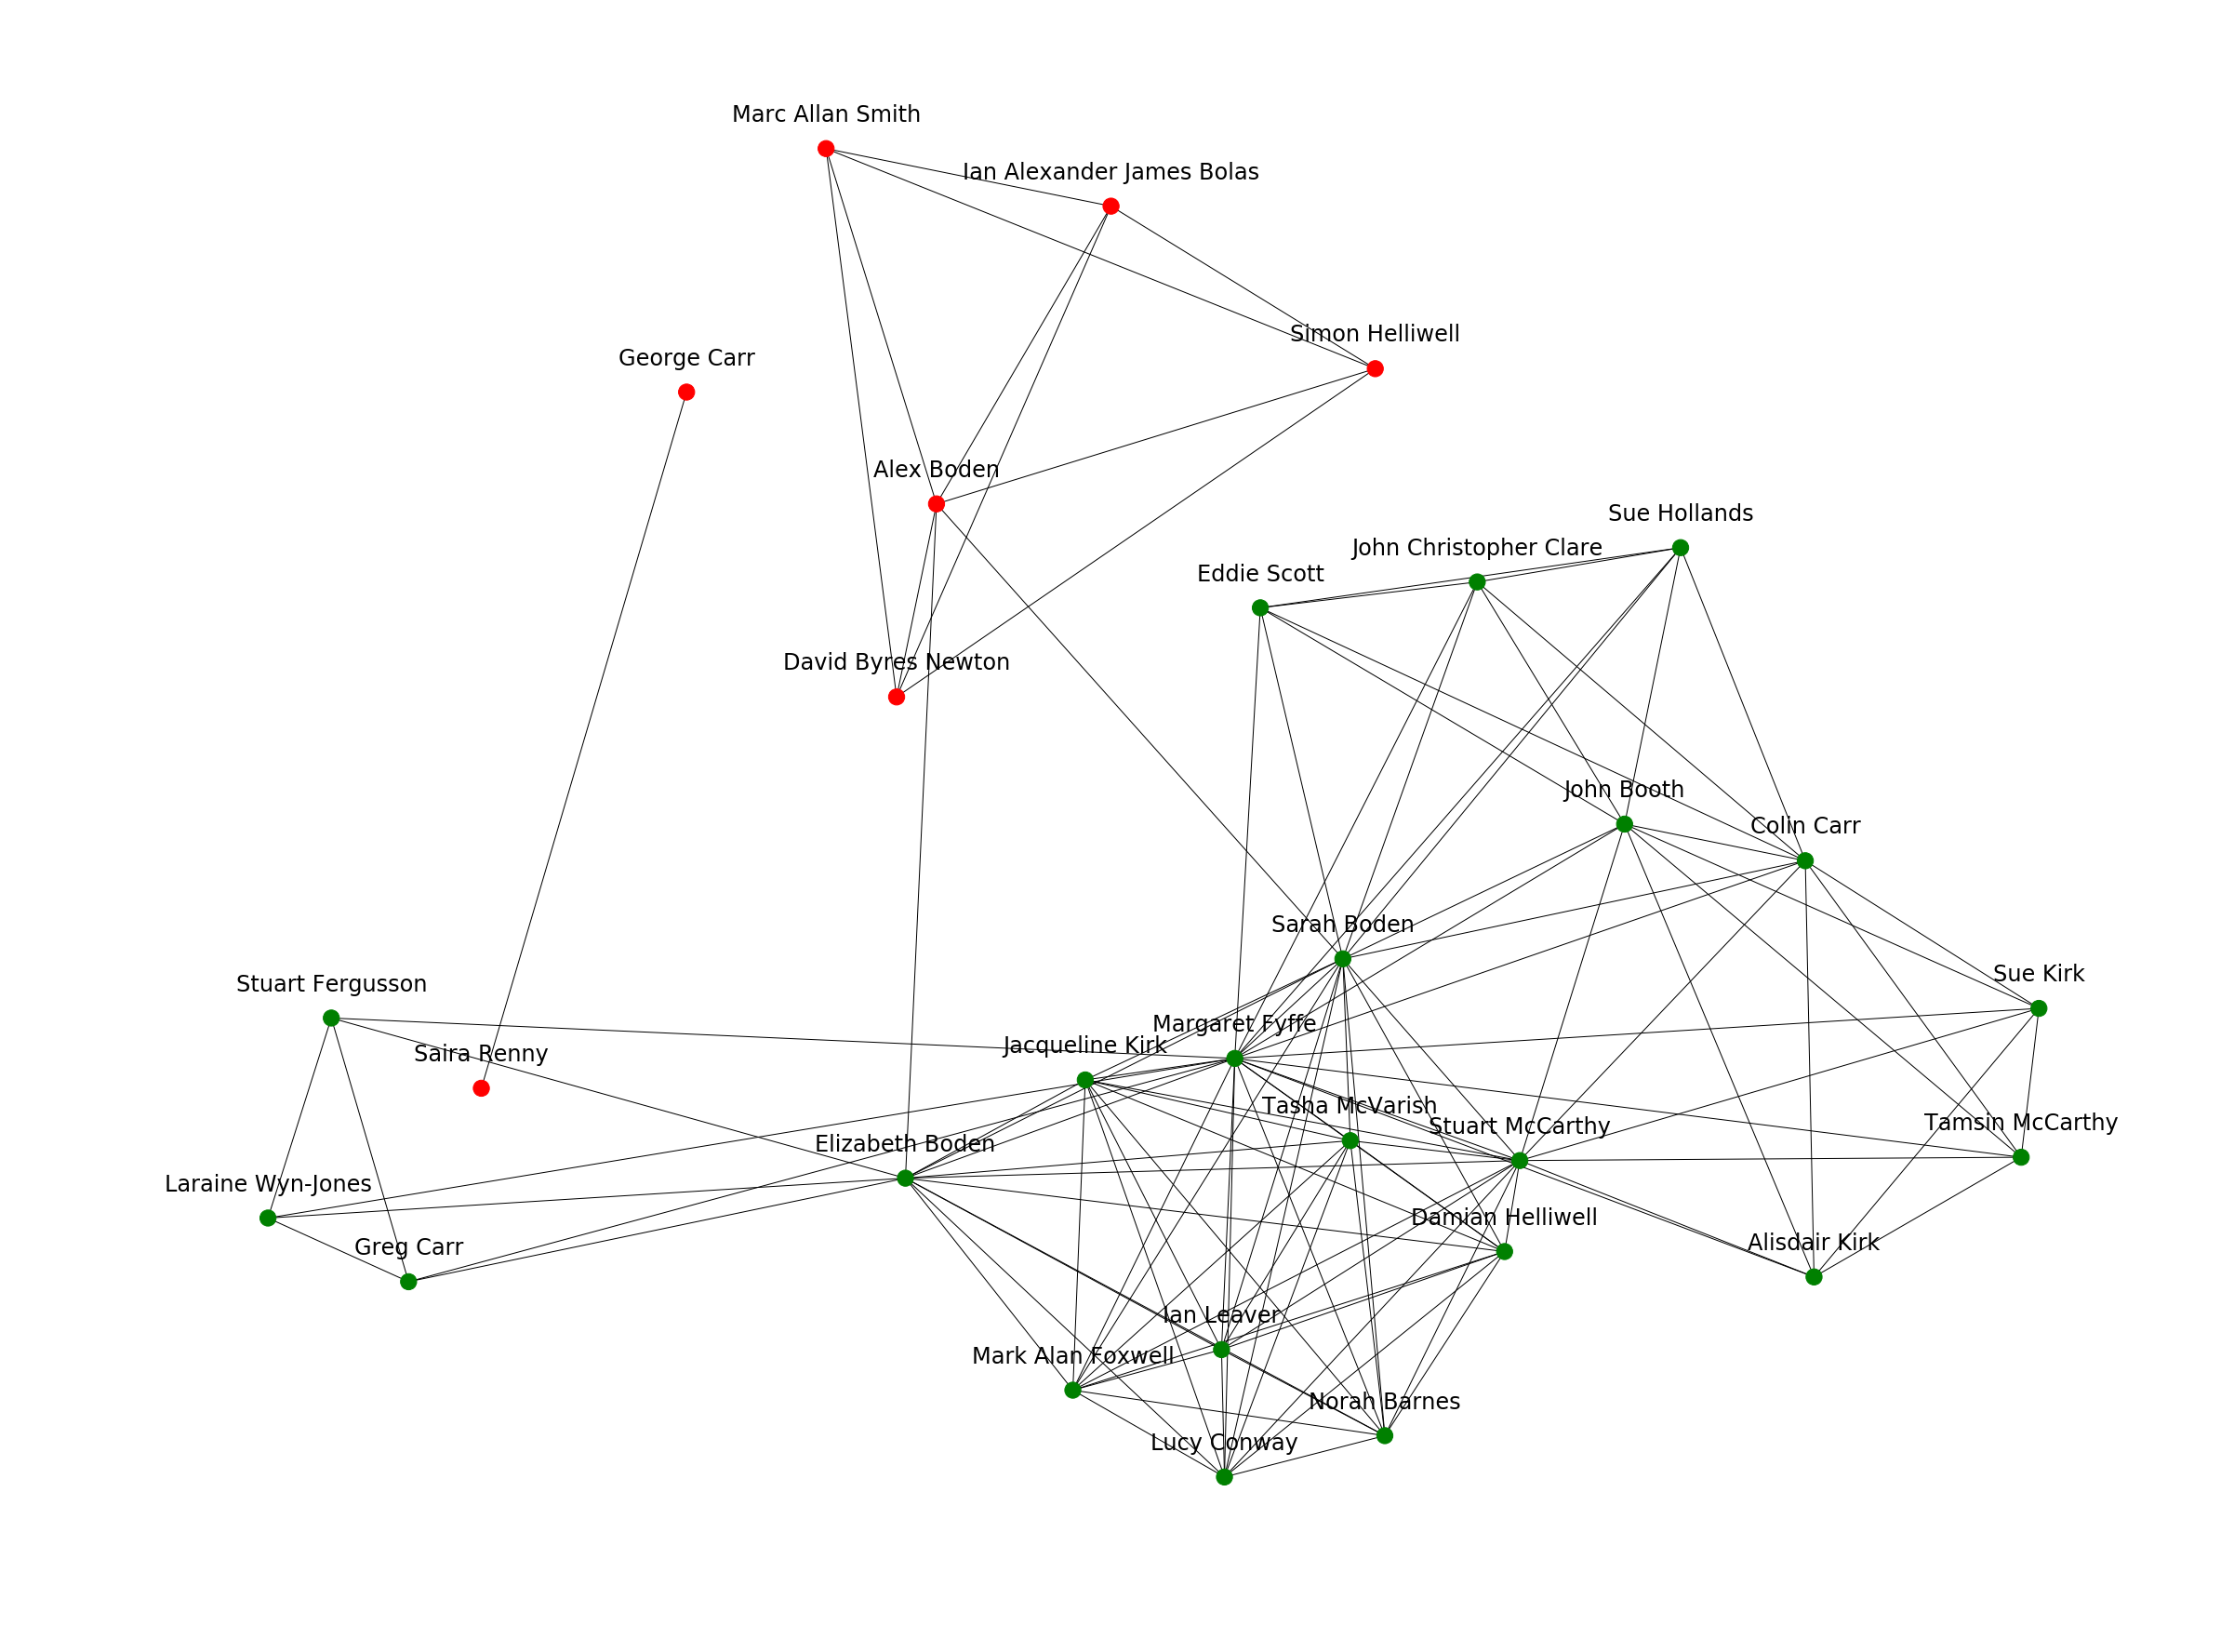

In [100]:
inPolitics = involvedInPolitics()
data = fullNonTourismNet()
G,labels = buildNamedBusinessGraph(data)
remove = [node for node,degree in G.degree() if degree == 0]
G.remove_nodes_from(remove)
colors = ["red" if inPolitics[x] == 0 else "green" for x in G.nodes()]
plotGraph(G,labels,colors)

# What happens if we take out the heritage centre?

(28, 28)



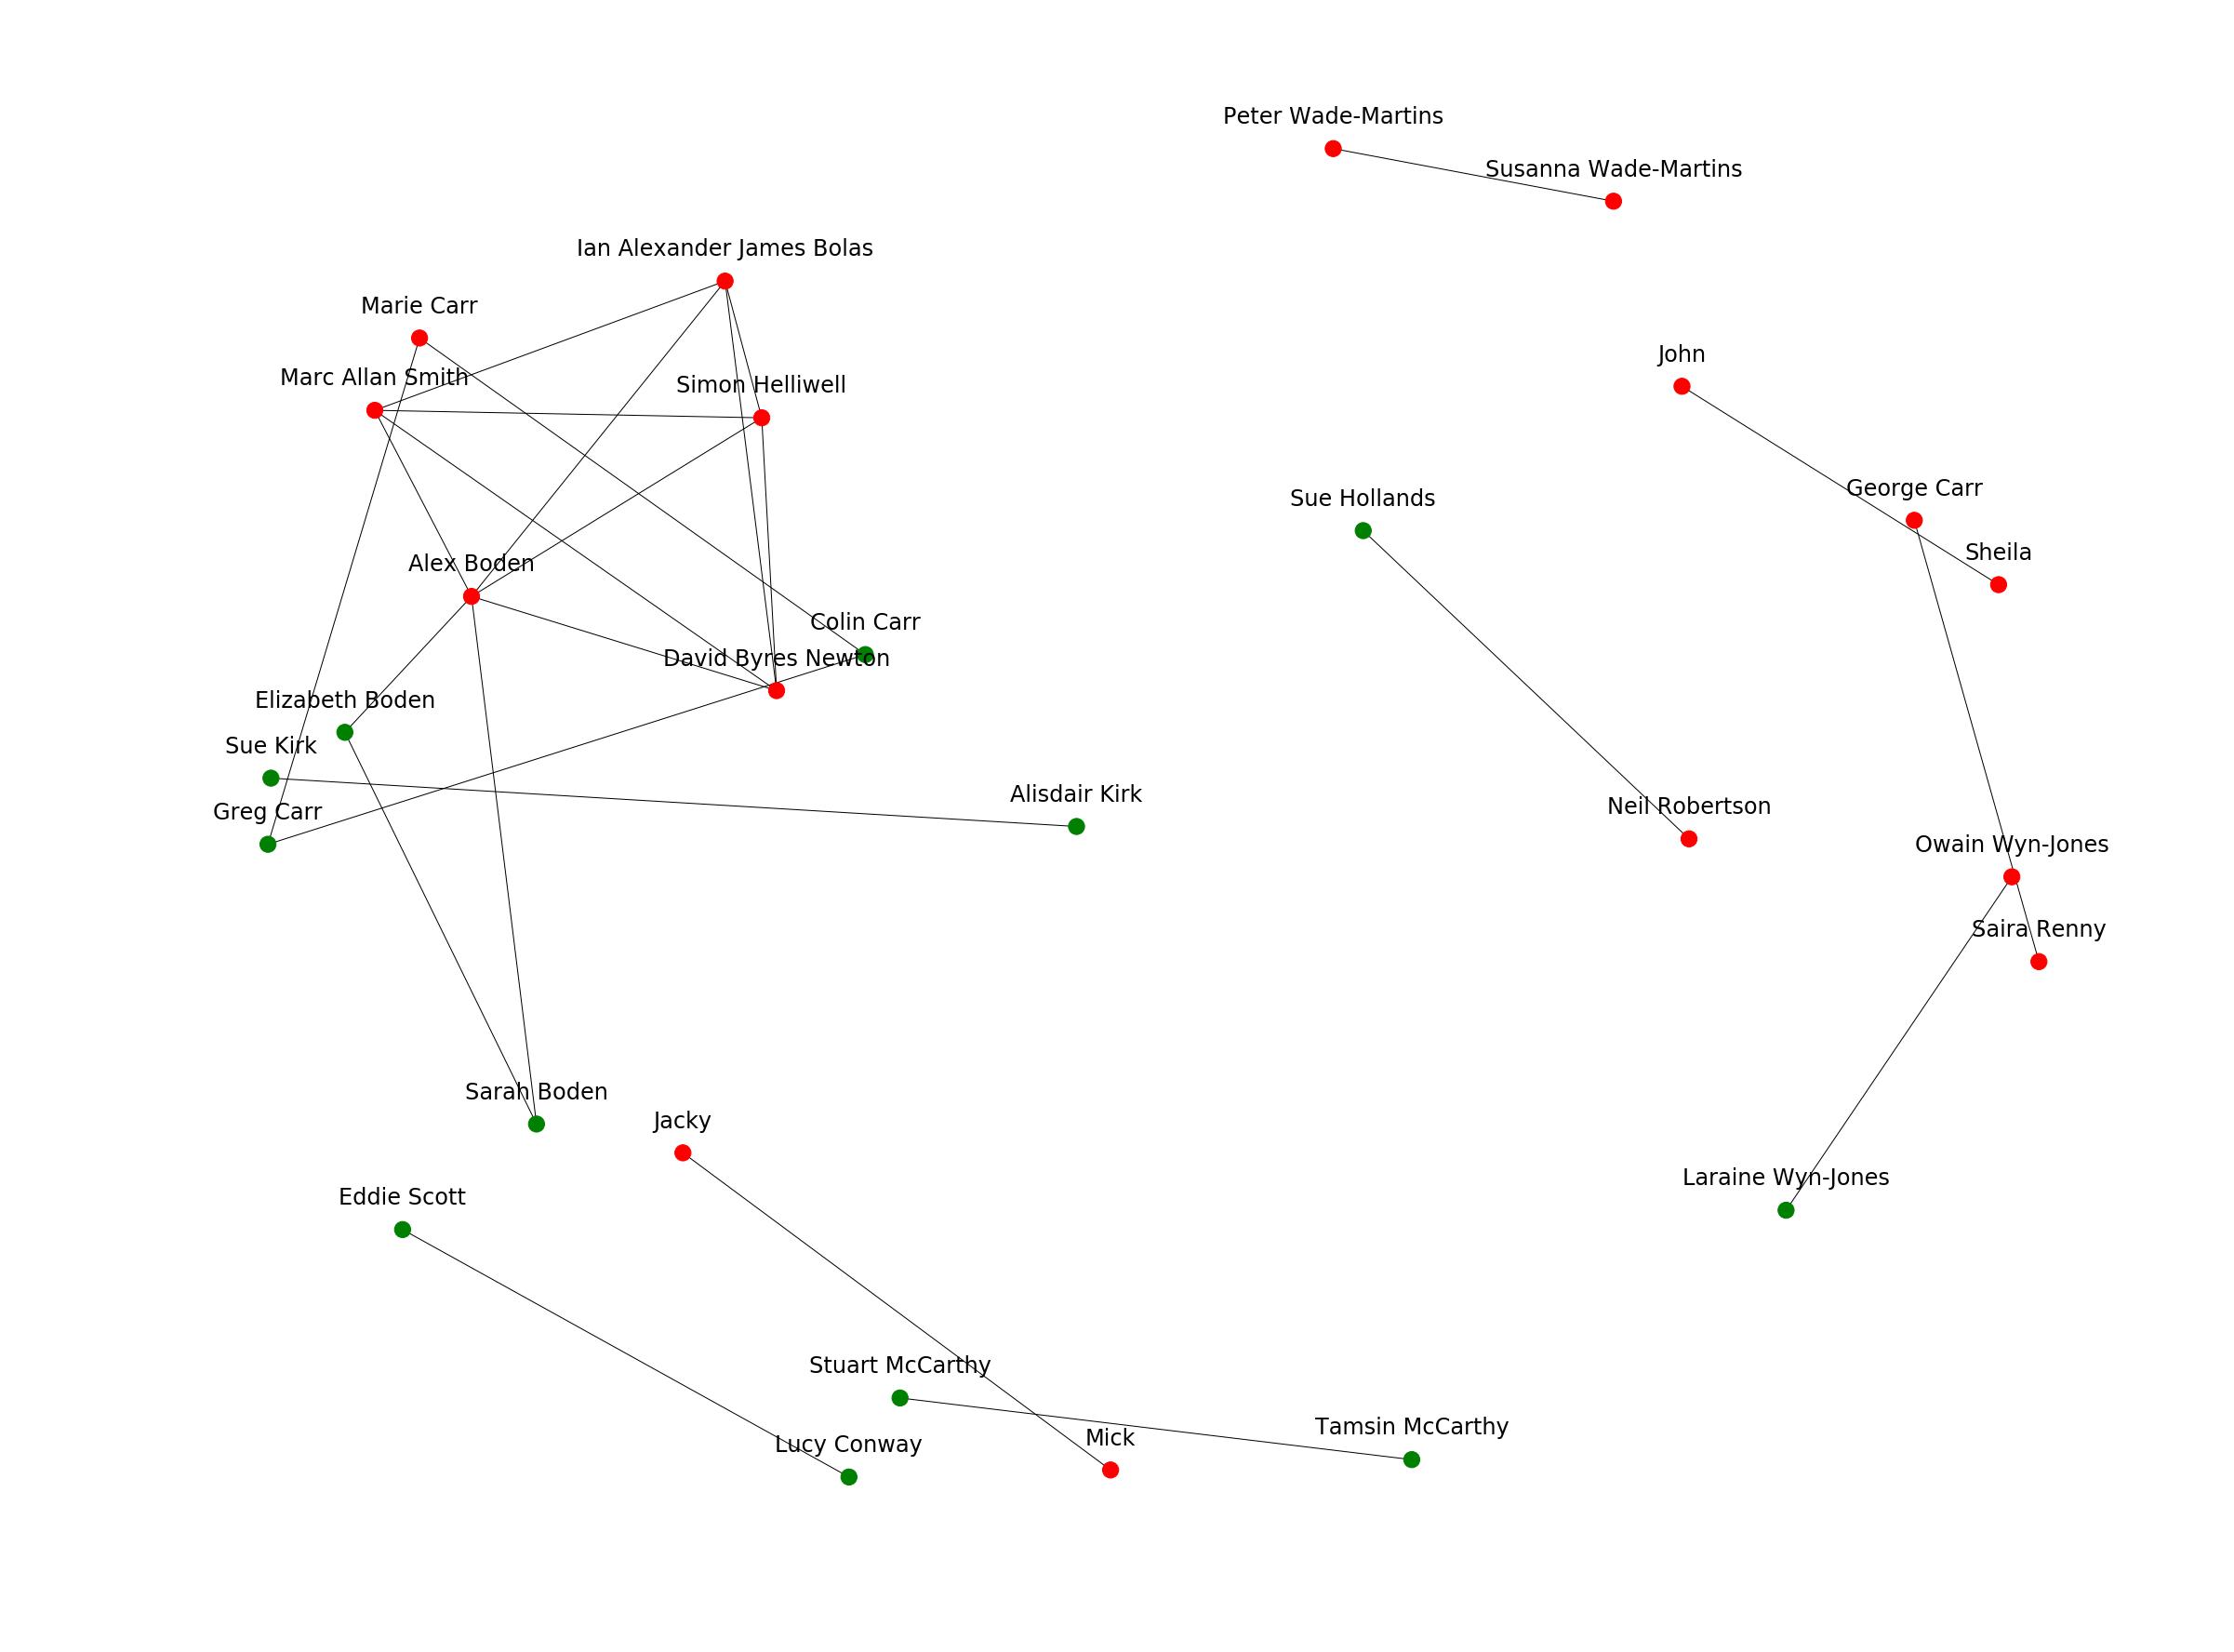

In [102]:
data = ownershipGraph()
itms = ["Heritage Trust", "Eigg Trading", "Eigg Construction", "Eigg Electric"]
politicals = set(itms)
for item in data:
    data[item] = list(set(data[item]) - politicals)
G,labels = buildNamedBusinessGraph(data)
remove = [node for node,degree in G.degree() if degree == 0]
G.remove_nodes_from(remove)


cx = involvedInPolitics()
colors = ["red" if cx[x] == 0 else "green" for x in G.nodes()]

plotGraph(G,labels,colors)
file_ = nx.to_numpy_matrix(G)
print(file_.shape)
print()
np.savetxt("mkay",file_, "%d")  